# Telecom Churn - ML Group Case Study

### Business Problem Overview

    In the telecom industry, customers are able to choose from multiple service providers and actively switch 
    from one operator to another. 
    In this highly competitive market, the telecommunications industry experiences 
    an average of 15-25% annual churn rate. 

    Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, 
    customer retention has now become even more important than customer acquisition.

### 1. Importing Libraries:-

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import scipy.stats as stats
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

from sklearn.cross_validation import train_test_split
from imblearn.over_sampling import SMOTE
#Improting the PCA module
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn.grid_search import GridSearchCV

from sklearn.ensemble import BaggingClassifier

import sklearn.ensemble as en
import pandas as pd

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

%matplotlib inline

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### 2. Data Preparation and Understanding:-

#### Data Understanding:-

    In this project we will analyse customer-level data of a leading telecom firm, build predictive models 
    to identify customers at high risk of churn and identify the main indicators of churn.

    Features of the dataset at a glance:-

    A. There are 226 columns and 0 to 99999 entries in each columns.
    B. There of 179 columns of float64 type , 35 columns of int64 type and 12 columns of object type. 


In [2]:
### Importing data
telecom_data= pd.read_csv("telecom_churn_data.csv")

In [3]:
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.0
1,7001051193,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,429.023,...,0,NaN,NaN,NaN,NaN,1673,0.00,0.00,0.00,0.0
2,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,0,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.0
3,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,690.008,...,0,NaN,NaN,NaN,NaN,667,0.00,0.00,0.00,0.0
4,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,0,NaN,NaN,NaN,NaN,720,0.00,0.00,0.00,0.0


In [4]:
telecom_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,3.065800e+04,30658.0,30646.0,30646.0,30646.0,30658.000000,30658.000000,30658.000000,30658.000000,30444.000000,...,30658.000000,10841.000000,11171.000000,10752.000000,10360.000000,30658.000000,30658.000000,30658.000000,30658.000000,30658.000000
mean,7.001163e+09,109.0,0.0,0.0,0.0,465.739906,468.650591,422.889548,383.117989,247.344791,...,0.165275,0.893644,0.886313,0.858352,0.843533,1030.835899,81.881787,84.489390,75.840784,5.265715
std,7.098188e+05,0.0,0.0,0.0,0.0,445.855377,467.870795,481.101291,469.969230,443.856167,...,1.024085,0.308306,0.317445,0.348705,0.363315,832.739255,310.635562,322.435037,310.281811,42.708723
min,7.000000e+09,109.0,0.0,0.0,0.0,-24.420000,-28.930000,-34.330000,-66.800000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000529e+09,109.0,0.0,0.0,0.0,207.477500,213.073000,159.139250,121.507750,20.025000,...,0.000000,1.000000,1.000000,1.000000,1.000000,436.250000,0.000000,0.000000,0.000000,0.000000
50%,7.001126e+09,109.0,0.0,0.0,0.0,364.835000,367.892500,323.085000,283.382000,80.590000,...,0.000000,1.000000,1.000000,1.000000,1.000000,734.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001794e+09,109.0,0.0,0.0,0.0,605.995500,607.186500,563.503750,523.083250,271.782500,...,0.000000,1.000000,1.000000,1.000000,1.000000,1335.000000,0.000000,0.000000,0.000000,0.000000
max,7.002410e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4321.000000,12916.220000,7994.840000,11166.210000,2618.570000


### Data Dictionary:-

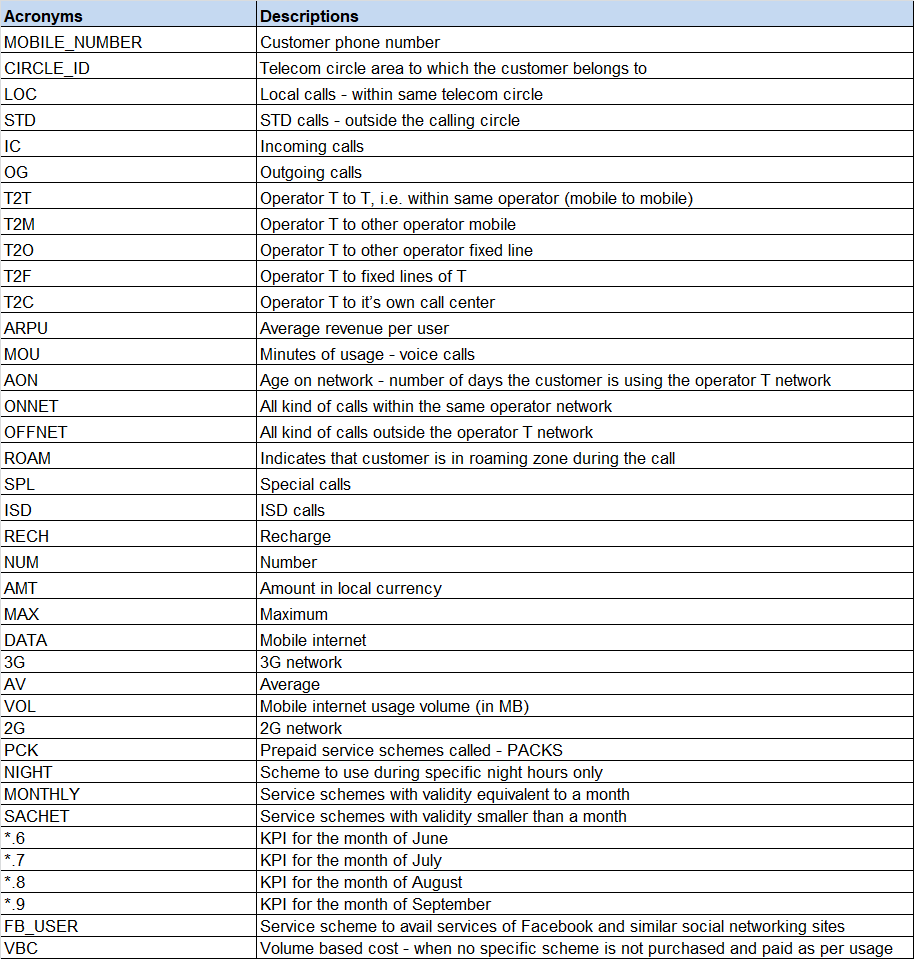

In [5]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30658 entries, 0 to 30657
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 52.9+ MB


In [6]:
# summarising number of missing values in each column
telecom_data.isnull().sum()

mobile_number               0
circle_id                   0
loc_og_t2o_mou             12
std_og_t2o_mou             12
loc_ic_t2o_mou             12
last_date_of_month_6        0
last_date_of_month_7       22
last_date_of_month_8      139
last_date_of_month_9      319
arpu_6                      0
arpu_7                      0
arpu_8                      0
arpu_9                      0
onnet_mou_6               214
onnet_mou_7               250
onnet_mou_8              1052
onnet_mou_9              1944
offnet_mou_6              214
offnet_mou_7              250
offnet_mou_8             1052
offnet_mou_9             1944
roam_ic_mou_6             214
roam_ic_mou_7             250
roam_ic_mou_8            1052
roam_ic_mou_9            1944
roam_og_mou_6             214
roam_og_mou_7             250
roam_og_mou_8            1052
roam_og_mou_9            1944
loc_og_t2t_mou_6          214
                        ...  
arpu_2g_9               20298
night_pck_user_6        19817
night_pck_

In [7]:
# percentage of missing values in each column
round(telecom_data.isnull().sum()/len(telecom_data.index), 2)*100

mobile_number            0.0
circle_id                0.0
loc_og_t2o_mou           0.0
std_og_t2o_mou           0.0
loc_ic_t2o_mou           0.0
last_date_of_month_6     0.0
last_date_of_month_7     0.0
last_date_of_month_8     0.0
last_date_of_month_9     1.0
arpu_6                   0.0
arpu_7                   0.0
arpu_8                   0.0
arpu_9                   0.0
onnet_mou_6              1.0
onnet_mou_7              1.0
onnet_mou_8              3.0
onnet_mou_9              6.0
offnet_mou_6             1.0
offnet_mou_7             1.0
offnet_mou_8             3.0
offnet_mou_9             6.0
roam_ic_mou_6            1.0
roam_ic_mou_7            1.0
roam_ic_mou_8            3.0
roam_ic_mou_9            6.0
roam_og_mou_6            1.0
roam_og_mou_7            1.0
roam_og_mou_8            3.0
roam_og_mou_9            6.0
loc_og_t2t_mou_6         1.0
                        ... 
arpu_2g_9               66.0
night_pck_user_6        65.0
night_pck_user_7        64.0
night_pck_user

Let's check whether some rows have a large number of missing values.

In [8]:
# missing values in rows
telecom_data.isnull().sum(axis=1)

0         40
1         40
2         20
3         40
4         40
5         40
6          0
7         30
8        127
9         40
10         0
11         0
12        40
13        40
14         0
15        40
16        30
17        40
18        20
19        59
20         0
21        10
22         0
23        69
24         0
25        40
26        88
27        40
28        40
29        40
        ... 
30628     40
30629      0
30630     40
30631     40
30632     40
30633     40
30634     20
30635      0
30636     20
30637     40
30638     20
30639     40
30640     10
30641     40
30642     40
30643     40
30644     40
30645      0
30646     40
30647     10
30648      0
30649     10
30650     30
30651     40
30652     10
30653     10
30654     99
30655      0
30656     30
30657     10
Length: 30658, dtype: int64

### Filter high-value customers -

    Defination of high-value customers as follows:-
    Those who have recharged with an amount more than or equal to X, where X is the 70th percentile 
    of the average recharge amount in the first two months (the good phase).

#### Note: - High value customer has been filtered from follwing columns -
    
    'total_rech_amt_6' - Total recharge amount (voice) for the month of 6
    'total_rech_amt_7' - Total recharge amount (voice) for the month of 7
    
    'total_rech_data_6' - Count of recharge amount (data) for the month of 6
    'total_rech_data_7' - Count of recharge amount (data) for the month of 7
    
    'av_rech_amt_data_6' - Avg. of recharge amount (data) for the month of 6
    'av_rech_amt_data_7' - Avg. of recharge amount (data) for the month of 7

    Total recharge amount per month ==> total_rech_amt_mnth + (total_rech_data_mnth * av_rech_amt_data_mnth )

In [9]:
#replacing null to avoid compulational issue --
telecom_data[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_data_6','total_rech_data_7','total_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']] =  telecom_data[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_data_6','total_rech_data_7','total_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']].replace(np.nan, 0, regex=True)

In [10]:
## Creating total amount KPI for Data:-

telecom_data['total_rech_amt_data_6'] = telecom_data.apply(lambda x: (x['total_rech_data_6']*x['av_rech_amt_data_6']),axis =1)
telecom_data['total_rech_amt_data_7'] = telecom_data.apply(lambda x: (x['total_rech_data_7']*x['av_rech_amt_data_7']),axis =1)

In [11]:
## Creating average amount KPI for data + talktime:-

telecom_data['avg_rech_amt_6_7'] = telecom_data.apply(lambda x: ((x['total_rech_amt_6']+x['total_rech_amt_7']+x['total_rech_amt_data_6']+x['total_rech_amt_data_7'])/2),axis =1)

#### Decile Analysis:-
    We have to choose customers belonging to 70 percentile and above

In [12]:
telecom_data['avg_rech_amt_6_7'].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]).T

count    30658.000000
mean       895.677108
std       1362.874778
min         32.500000
10%        196.000000
20%        279.000000
30%        359.500000
40%        455.000000
50%        569.000000
60%        703.500000
70%        882.950000
80%       1154.000000
90%       1754.000000
max      61236.000000
Name: avg_rech_amt_6_7, dtype: float64

In [13]:
#Lets create a KPI for decile
telecom_data['avg_rech_decile'] = pd.qcut(telecom_data['avg_rech_amt_6_7'], 10, labels=False)

In [14]:
##Choosing customers belonging to 70 percentile and above
telecom_data_high_value = telecom_data[telecom_data.avg_rech_decile >= 7 ]

In [15]:
telecom_data_high_value.count()[0]

9198

   We have filtered out **29.9K** high value customers - we will be working on dataset - **telecom_data_high_value** having high valued customers only

### Creating Some KPIs


### Frequency of customer buying voice and data pack in first 3 months

**Frequency of buying voice pack**

In [16]:
def churnfreqrec(telecom_data_high_value):
    i = 0
    a = np.where(telecom_data_high_value[['date_of_last_rech_6']].isnull(),0,1)
    i = i+a
    b = np.where(telecom_data_high_value[['date_of_last_rech_7']].isnull(),0,1)
    i=i+b
    c = np.where(telecom_data_high_value[['date_of_last_rech_8']].isnull(),0,1)
    i=i+c
    return i

In [17]:
telecom_data_high_value['Frequency_recharge_voice'] = 0
telecom_data_high_value['Frequency_recharge_voice'] = telecom_data_high_value.apply(churnfreqrec, axis=1)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


**Frequency of buying data pack**

In [18]:
telecom_data_high_value['Frequency_recharge_data'] = 0
telecom_data_high_value['Frequency_recharge_data'] = telecom_data_high_value.apply(lambda x: (x['total_rech_data_6']+x['total_rech_data_7']+x['total_rech_data_8']),axis =1)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
##dropping individual frequency columns since total frequency has been caluclate for data -
telecom_data_high_value.drop(['total_rech_data_6','total_rech_data_7', 'total_rech_data_8'], axis=1, inplace=True)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Recency of buying voice and data packs

#### Working with date variables to prepare for further calculations

In [20]:
for variable in telecom_data_high_value.columns:
    if telecom_data_high_value[variable].dtype.name in ['object']:
        print (variable)

last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
last_date_of_month_9
date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_9
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8
date_of_last_rech_data_9


In [21]:
## Reference data columns (refernce dates for last date of the month)
## instead of replacing the nan columns we are hardcoding the columns with the date of the last day of the month
telecom_data_high_value['last_date_of_month_6'] = pd.to_datetime('6/30/2014', format='%m/%d/%Y')
telecom_data_high_value['last_date_of_month_7'] = pd.to_datetime('7/31/2014', format='%m/%d/%Y')
telecom_data_high_value['last_date_of_month_8'] = pd.to_datetime('8/31/2014', format='%m/%d/%Y')
telecom_data_high_value['last_date_of_month_9'] = pd.to_datetime('9/30/2014', format='%m/%d/%Y')

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [22]:
## making the date pattern uniform
telecom_data_high_value[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']] = telecom_data_high_value[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']].replace('-', '/', regex=True)

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [23]:
## converting the columns to date format
telecom_data_high_value['date_of_last_rech_6'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_6'], format='%m/%d/%Y')
telecom_data_high_value['date_of_last_rech_7'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_7'], format='%m/%d/%Y')
telecom_data_high_value['date_of_last_rech_8'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_8'], format='%m/%d/%Y')
telecom_data_high_value['date_of_last_rech_9'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_9'], format='%m/%d/%Y')
telecom_data_high_value['date_of_last_rech_data_6'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_data_6'], format='%m/%d/%Y')
telecom_data_high_value['date_of_last_rech_data_7'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_data_7'], format='%m/%d/%Y')
telecom_data_high_value['date_of_last_rech_data_8'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_data_8'], format='%m/%d/%Y')
telecom_data_high_value['date_of_last_rech_data_9'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_data_9'], format='%m/%d/%Y')

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

#### Calculating the Recency of last recharge - voice

In [24]:
def churnrecv(telecom_data_high_value):
    k=True
    b = np.where(telecom_data_high_value[['date_of_last_rech_8']].isnull(),0,1)
    c = np.where(telecom_data_high_value[['date_of_last_rech_7']].isnull(),0,1)
    d = np.where(telecom_data_high_value[['date_of_last_rech_6']].isnull(),0,1)
    while True:
        if b == 1:
            no_of_Days = (telecom_data_high_value['last_date_of_month_8']  - telecom_data_high_value['date_of_last_rech_8'])
            break
        elif c == 1:
            no_of_Days = (telecom_data_high_value['last_date_of_month_8']  - telecom_data_high_value['date_of_last_rech_7'])
            break
        elif d == 1:
            no_of_Days = (telecom_data_high_value['last_date_of_month_8']  - telecom_data_high_value['date_of_last_rech_6'])
            break
    return no_of_Days

In [25]:
telecom_data_high_value['Recency_last_recharge_voice'] = telecom_data_high_value.apply(churnrecv, axis=1)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Calculating the Recency of last recharge - data

In [26]:
def churnrecd(telecom_data_high_value):
    k=True
    b = np.where(telecom_data_high_value[['date_of_last_rech_8']].isnull(),0,1)
    c = np.where(telecom_data_high_value[['date_of_last_rech_7']].isnull(),0,1)
    d = np.where(telecom_data_high_value[['date_of_last_rech_6']].isnull(),0,1)
    while True:
        if b == 1:
            no_of_Days = (telecom_data_high_value['last_date_of_month_8']  - telecom_data_high_value['date_of_last_rech_data_8'])
            break
        elif c == 1:
            no_of_Days = (telecom_data_high_value['last_date_of_month_8']  - telecom_data_high_value['date_of_last_rech_data_7'])
            break
        elif d == 1:
            no_of_Days = (telecom_data_high_value['last_date_of_month_8']  - telecom_data_high_value['date_of_last_rech_data_6'])
            break
    return no_of_Days

In [27]:
telecom_data_high_value['Recency_last_recharge_data'] = telecom_data_high_value.apply(churnrecd, axis=1)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


**Lets observe some trends in monetary value**
- ARPU (Average Revenue per user) can be treated as Monetary value here.

In [28]:
# extracting month and year from issue_date
telecom_data_high_value['date_of_last_rech_6_month'] = telecom_data_high_value['date_of_last_rech_6'].apply(lambda x: x.month)
telecom_data_high_value['date_of_last_rech_7_month'] = telecom_data_high_value['date_of_last_rech_7'].apply(lambda x: x.month)
telecom_data_high_value['date_of_last_rech_8_month'] = telecom_data_high_value['date_of_last_rech_8'].apply(lambda x: x.month)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

**Trend of monetary value for first 3 years**

    We see a sharp decline in the monetary value in the 7th month.
    Also the mean value shifts to lower value as shown in the box plot.

In [29]:
# let's first observe the number of mean revenue across month
print(telecom_data_high_value.groupby('date_of_last_rech_6_month').arpu_6.mean().round(2))
print(telecom_data_high_value.groupby('date_of_last_rech_7_month').arpu_7.mean().round(2))
print(telecom_data_high_value.groupby('date_of_last_rech_8_month').arpu_8.mean().round(2))

date_of_last_rech_6_month
6.0    768.29
Name: arpu_6, dtype: float64
date_of_last_rech_7_month
7.0    775.24
Name: arpu_7, dtype: float64
date_of_last_rech_8_month
8.0    683.12
Name: arpu_8, dtype: float64


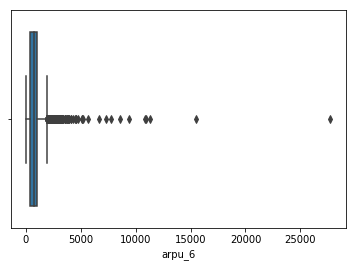

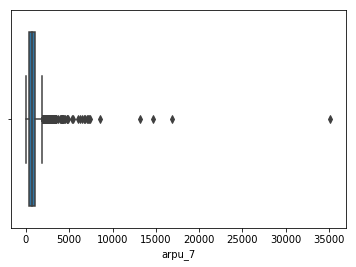

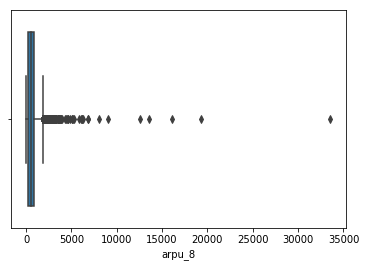

In [30]:
sns.boxplot(telecom_data_high_value['arpu_6'])
plt.show()
sns.boxplot(telecom_data_high_value['arpu_7'])
plt.show()
sns.boxplot(telecom_data_high_value['arpu_8'])
plt.show()

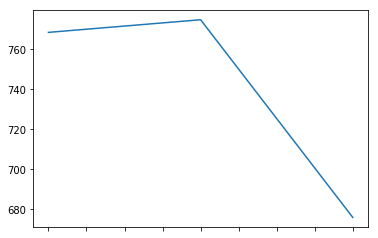

In [31]:
pv = pd.pivot_table(telecom_data_high_value, columns='date_of_last_rech_6_month',
                    values=['arpu_6', 'arpu_7', 'arpu_8']  , aggfunc='mean')
pv
pv.plot(legend=False)

**Lets see the trend accross incomming and outgoing calls**

    We see a sharp decline in Outgoing and incomming calls from first two to third month

In [32]:
# let's first observe the number of mean outgoing calls across month
print(telecom_data_high_value.groupby('date_of_last_rech_6_month').loc_og_mou_6.mean().round(2))
print(telecom_data_high_value.groupby('date_of_last_rech_7_month').loc_og_mou_7.mean().round(2))
print(telecom_data_high_value.groupby('date_of_last_rech_8_month').loc_og_mou_8.mean().round(2))

date_of_last_rech_6_month
6.0    329.95
Name: loc_og_mou_6, dtype: float64
date_of_last_rech_7_month
7.0    334.54
Name: loc_og_mou_7, dtype: float64
date_of_last_rech_8_month
8.0    303.44
Name: loc_og_mou_8, dtype: float64


In [33]:
# let's first observe the number of mean incoming calls across month
print(telecom_data_high_value.groupby('date_of_last_rech_6_month').total_ic_mou_6.mean().round(2))
print(telecom_data_high_value.groupby('date_of_last_rech_7_month').total_ic_mou_7.mean().round(2))
print(telecom_data_high_value.groupby('date_of_last_rech_8_month').total_ic_mou_8.mean().round(2))

date_of_last_rech_6_month
6.0    333.17
Name: total_ic_mou_6, dtype: float64
date_of_last_rech_7_month
7.0    345.0
Name: total_ic_mou_7, dtype: float64
date_of_last_rech_8_month
8.0    320.93
Name: total_ic_mou_8, dtype: float64


**Dropping unnecessary columns**

In [34]:
##Dropping av_rech_amt_data_mnth column since we already have created KPI for total.
##Dropping decile column since it is no longer necessary

telecom_data_high_value.drop(['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'avg_rech_decile'], axis=1, inplace= True)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


**Dropping columns with single vlaue diversity**
    
    circle_id        - single value '109'
    
**Replacing NULL value with '1':-**
    
    Categorical levels:-
    loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou
    
    '0' - signifies have done some calls per user (loc/std/mou).
    '1' - signifies have done none. (28 customers no loc_og or std_og or loc_ic).

In [35]:
telecom_data_high_value[['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']].nunique()

circle_id         1
loc_og_t2o_mou    1
std_og_t2o_mou    1
loc_ic_t2o_mou    1
dtype: int64

In [36]:
telecom_data_high_value[['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']].isnull().any()

circle_id         False
loc_og_t2o_mou     True
std_og_t2o_mou     True
loc_ic_t2o_mou     True
dtype: bool

In [37]:
## Dropping circle id
telecom_data_high_value.drop( 'circle_id', axis=1, inplace= True)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
##replacing null in 'loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'

telecom_data_high_value[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']] = telecom_data_high_value[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']].replace(np.nan, 1, regex=True)

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


**Checking the size of each category**
    - 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'

In [39]:
for x in ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou']:
    print(telecom_data_high_value.groupby(x).size())

loc_og_t2o_mou
0.0    9192
1.0       6
dtype: int64
std_og_t2o_mou
0.0    9192
1.0       6
dtype: int64
loc_ic_t2o_mou
0.0    9192
1.0       6
dtype: int64


### Creating CHURN indictor-

    We are now going to define the churn indicator :
    Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even 
    once in the churn phase. The attributes you need to use to tag churners are:
   
    Columns to consider:-
    a. total_ic_mou_9
    b. total_og_mou_9
    c. vol_2g_mb_9
    d. vol_3g_mb_9

In [40]:
## There are no NULL value - so pre processing not required
telecom_data_high_value[['total_ic_mou_9','total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].isnull().any()

total_ic_mou_9    False
total_og_mou_9    False
vol_2g_mb_9       False
vol_3g_mb_9       False
dtype: bool

In [41]:
#function to create churn
def churnind(telecom_data_high_value):
    if ((telecom_data_high_value.total_ic_mou_9 == 0) & (telecom_data_high_value.total_og_mou_9 == 0) & (telecom_data_high_value.vol_2g_mb_9 == 0) & (telecom_data_high_value.vol_3g_mb_9 == 0)):
        return 1
    else:
        return 0

In [42]:
telecom_data_high_value['CHURN_IND'] = telecom_data_high_value.apply(churnind, axis=1)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
#Split by churn indicator
telecom_data_high_value.groupby('CHURN_IND').size()

CHURN_IND
0    8466
1     732
dtype: int64

**So we have now 2433 churner which makes ~8% of the total high value customers**

**Dropping attributes for the 9th month**

In [44]:
## Since we are done with generating the KPIs and required parameters, we will drop all _9 columns

In [45]:
telecom_tobedel = telecom_data_high_value.filter(regex='_9')
telecom_tobedel.columns

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user

In [46]:
telecom_data_new  = telecom_data_high_value.drop(telecom_tobedel.columns, axis=1)

In [47]:
telecom_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9198 entries, 6 to 30648
Columns: 176 entries, mobile_number to CHURN_IND
dtypes: datetime64[ns](9), float64(137), int32(1), int64(27), timedelta64[ns](2)
memory usage: 12.4 MB


**Deleting Date columns since we have already generated the required KPIs and EDA**

In [48]:
### Drop date variables since we have already used it to create recency and frequency -
telecom_data_new.drop(['last_date_of_month_6',
'last_date_of_month_7',
'last_date_of_month_8',
'date_of_last_rech_6',
'date_of_last_rech_7',
'date_of_last_rech_8',
'date_of_last_rech_data_6',
'date_of_last_rech_data_7',
'date_of_last_rech_data_8',
'date_of_last_rech_6_month',
'date_of_last_rech_8_month',
'date_of_last_rech_7_month'],axis=1, inplace = True)

In [49]:
telecom_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9198 entries, 6 to 30648
Columns: 164 entries, mobile_number to CHURN_IND
dtypes: float64(134), int32(1), int64(27), timedelta64[ns](2)
memory usage: 11.5 MB


    We now have reduced the varaibles to 164 -
        Next, we will work with numeric and categoric data for model building

**Converting the recency column to numeric type**

#Extracting only the numeric part of recency column -

    -- Recency_last_recharge_voice
    -- Recency_last_recharge_data

In [50]:
telecom_data_new['Recency_last_recharge_voice'] = telecom_data_new['Recency_last_recharge_voice'].astype('str')

In [51]:
telecom_data_new['Recency_last_recharge_data'] = telecom_data_new['Recency_last_recharge_data'].astype('str')

In [52]:
telecom_data_new['Recency_last_recharge_data'] = telecom_data_new['Recency_last_recharge_data'].replace('NaT', '0 days', regex=True)

In [53]:
telecom_data_new['Recency_last_recharge_voice'] = telecom_data_new['Recency_last_recharge_voice'].apply(lambda x: pd.to_numeric(x.split(" ")[0]))

In [54]:
telecom_data_new['Recency_last_recharge_data'] = telecom_data_new['Recency_last_recharge_data'].apply(lambda x: pd.to_numeric(x.split(" ")[0]))

In [55]:
telecom_data_new[['Recency_last_recharge_voice','Recency_last_recharge_data']].head()

,Recency_last_recharge_voice,Recency_last_recharge_data
6,5,5
9,3,0
10,5,29
11,0,0
15,0,0


In [56]:
telecom_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9198 entries, 6 to 30648
Columns: 164 entries, mobile_number to CHURN_IND
dtypes: float64(134), int32(1), int64(29)
memory usage: 11.5 MB


**Creating seperate List for categorical and numeric variables**

**Categorical List**

In [57]:
cat_list = ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'night_pck_user_6', 'night_pck_user_7','night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8','CHURN_IND']
cat_list

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'CHURN_IND']

**Numerical List**

In [58]:
numlist = []
for x in telecom_data_new.columns:
    if x not in(cat_list):
        numlist.append(x)
numlist

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 '

**Checking for NULL values**

    -- We see lots of NULL values specifically in 2g and 3g columns

In [59]:
#Creating a dataset out of the SUM of NULLs
no_of_null = pd.DataFrame(telecom_data_new[numlist].isnull().sum(axis=0)).reset_index()
no_of_null.rename(columns={ no_of_null.columns[0]: "Attributes",no_of_null.columns[1]: "NoOfNulls"},inplace=True)

In [60]:
#Taking columns where > 0.7 percentile rows are NA:-
#no_of_null[no_of_null['NoOfNulls'] > 0].head()
no_of_null.sort_values(by ='NoOfNulls', ascending=False).head(20)

,Attributes,NoOfNulls
114,count_rech_2g_8,3117
126,arpu_3g_8,3117
111,max_rech_data_8,3117
129,arpu_2g_8,3117
117,count_rech_3g_8,3117
115,count_rech_3g_6,2821
109,max_rech_data_6,2821
112,count_rech_2g_6,2821
124,arpu_3g_6,2821
127,arpu_2g_6,2821


In [61]:
## Replacing Numeric 'NaN' values as ZEROs to avoid computational error for numerical variables

In [62]:
telecom_data_new[numlist] = telecom_data_new[numlist].replace(np.nan, 0, regex=True)

In [63]:
telecom_data_new[numlist].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9198 entries, 6 to 30648
Columns: 154 entries, mobile_number to Recency_last_recharge_data
dtypes: float64(125), int32(1), int64(28)
memory usage: 10.8 MB


### Merging the 2G and 3G columns 

In [64]:
telecom_data_new['arpu_2g_3g_8'] = telecom_data_new.apply(lambda x: (x['arpu_3g_8']+x['arpu_2g_8']),axis =1)

In [65]:
telecom_data_new['arpu_2g_3g_7'] = telecom_data_new.apply(lambda x: (x['arpu_3g_7']+x['arpu_2g_7']),axis =1)

In [66]:
telecom_data_new['arpu_2g_3g_6'] = telecom_data_new.apply(lambda x: (x['arpu_3g_6']+x['arpu_2g_6']),axis =1)

In [67]:
telecom_data_new['count_rech_2g_3g_8'] = telecom_data_new.apply(lambda x: (x['count_rech_2g_8']+x['count_rech_3g_8']),axis =1)

In [68]:
telecom_data_new['count_rech_2g_3g_7'] = telecom_data_new.apply(lambda x: (x['count_rech_2g_7']+x['count_rech_3g_7']),axis =1)

In [69]:
telecom_data_new['count_rech_2g_3g_6'] = telecom_data_new.apply(lambda x: (x['count_rech_2g_6']+x['count_rech_3g_6']),axis =1)

In [70]:
###dropping the individual 2g and 3g columns

In [71]:
telecom_data_new.drop(['arpu_3g_8','arpu_2g_8','arpu_3g_7','arpu_2g_7', 'arpu_3g_6','arpu_2g_6','count_rech_2g_8','count_rech_3g_8', 'count_rech_2g_7', 'count_rech_3g_7', 'count_rech_2g_6', 'count_rech_3g_6'], axis =1, inplace= True)

**Lets plot the numeric attributes**

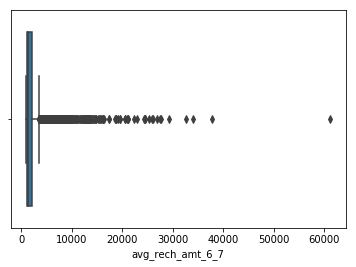

In [72]:
sns.boxplot(telecom_data_new['avg_rech_amt_6_7'])
plt.show()

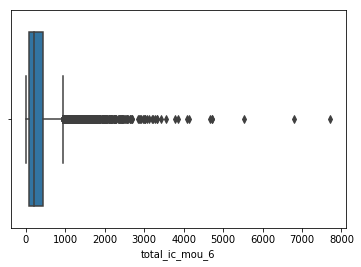

In [73]:
sns.boxplot(telecom_data_new['total_ic_mou_6'])
plt.show()

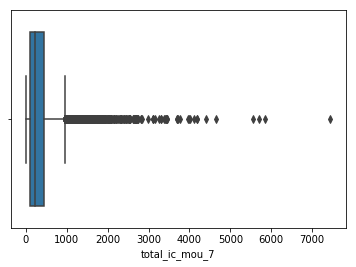

In [74]:
sns.boxplot(telecom_data_new['total_ic_mou_7'])
plt.show()

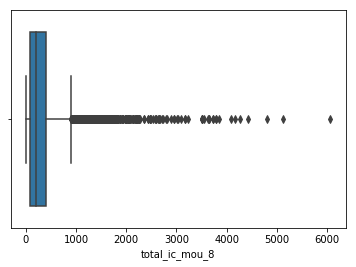

In [75]:
sns.boxplot(telecom_data_new['total_ic_mou_8'])
plt.show()

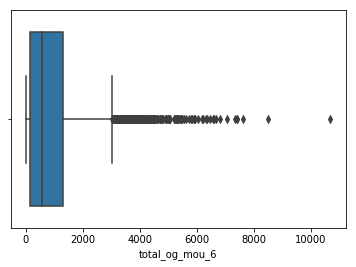

In [76]:
sns.boxplot(telecom_data_new['total_og_mou_6'])
plt.show()

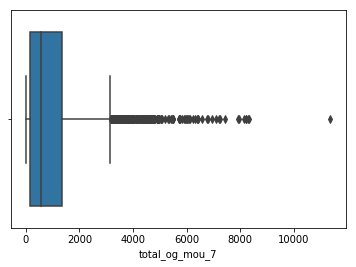

In [77]:
sns.boxplot(telecom_data_new['total_og_mou_7'])
plt.show()

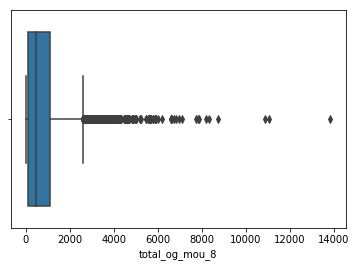

In [78]:
sns.boxplot(telecom_data_high_value['total_og_mou_8'])
plt.show()

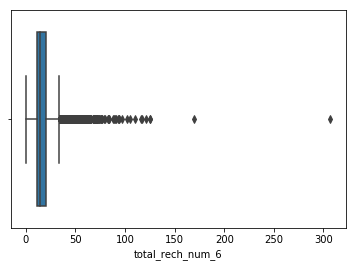

In [79]:
sns.boxplot(telecom_data_new['total_rech_num_6'])
plt.show()

**We can see outliers influence in numeric attributes** - needs outlier treatment

In [80]:
#Recalculating the numlist
numlistnew = []
for x in telecom_data_new.columns:
    if x not in(cat_list):
        numlistnew.append(x)
numlistnew

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 '

In [81]:
#taking all numeric attributes except mobile_number
numlist_f = numlistnew[1:]
len(numlist_f)

147

In [82]:
#Handling Outliers - Numeric variables
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.90))
    x = x.clip_lower(x.quantile(0.01))
    return x

In [83]:
telecom_data_new[numlist_f]=telecom_data_new[numlist_f].apply(lambda x: outlier_capping(x))

In [84]:
telecom_toplot = telecom_data_new[numlist_f].filter(regex='_8')
plot_cols = telecom_toplot.columns
plot_cols

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
       'std_og_t2c_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8',
       'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8',
       'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'max_rech_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8',
       'arpu_2g_3g_8', 'count_rech_2g_3g_8'],
      dtype='object')

## Bivariate Analysis and Synopysis on numerical varaibles

**1. Absolute churn -**
    
    Absolute churn signifies the factors where churn is always higher than non-churn. 
    Certain factors have a high contribution to the overall churn, these factors show a trend across 
    months for a greater churn than non churn. 
    For absolute churn - 
    •	Roaming both incoming and outgoing is a big contributor
    •	Other contributors are total recharge amount and maximum recharge amount, 
        which we will learn below is more of a voice based recharges primarily. 


**2. Churn -**

    Churn section includes the factors wherein the churn rate was higher in the first months 
    but it reduced with the time and for some cases it even converted to non churn. 
    
    •	The factors that see a churn in the first 2 months and non-churn in the third month are
        - STD outgoing for all facilities like t2t, t2f, t2m and t2c. 
    •	Other such factors are Total recharge amount and last recharge amount.
    
    •	This section includes a perticular trend for some of the factors where in the overall journey changes 
        from churn to non-churn and with a margin of upwards of 100% 
        - Total Outgoing, STD incoming, last day general recharge trends and recharge count for 2G & 3G. 
        This is a factor primarily governed by the added services the service provider has provided to the users.
        
    •	This perticular trend is also seen in the average revenue per user, on network users 
        and off network users where the trend started with a higher tendency of churn but reduced 
        by a big margin during the subsequent months and non-churn overtook with more than 100% share.
        
**3. Neutral factors -**

    These factors are the ones that did not have much to contribute for any of churn or non - churn.
    
    •	These factors are ISD, OG, STD incoming t2o facility and other incoming.
    
**4. Absolute Non-Churn -**

    These factors are where the non-churn is absolute across months. The factors include - 
    
    •	Data, 2G &  3G services, for all the areas that include internet usage for 2g, 3g or social media 
    the tendency is to not churn. 
    
    People using internet services for all the recharge frequency, amount, total recharge and maximum recharge 
    and numbers keep the non churn high by a significant margin. 
    
    •	Other services that have kept the non churn strong are local incoming and total incoming numbers 
    for all months. 
    •	Age of network (AON) is other factor that has given a stronger non-churn when compared with 
    churn because of brand resonance and legacy.
    
**5. Recency and Frequency -** 
    
    Recency explains the most recent recharge or usage and frequency explains 
    about the number of times a recharge etc was done. 
    
    •	Recency for voice though unexpected still gives an extremely high churn rate
    •	Recency of data and frequency generally stick to the non churn scheme of things


C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


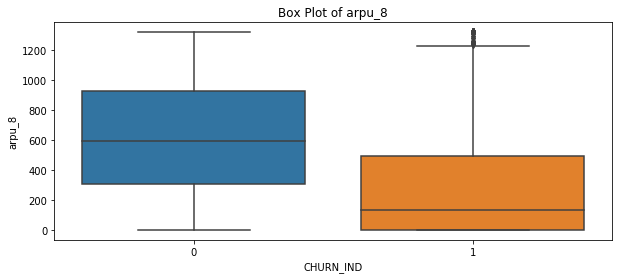

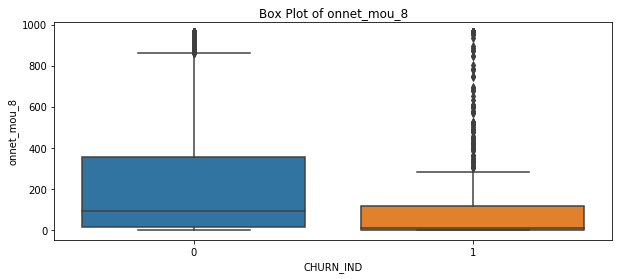

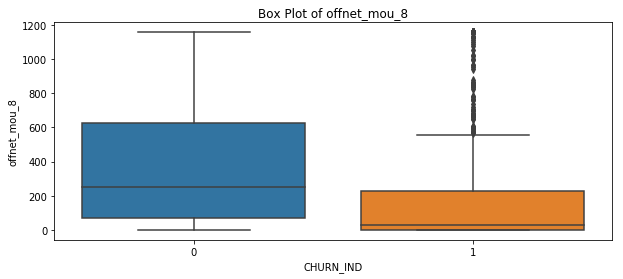

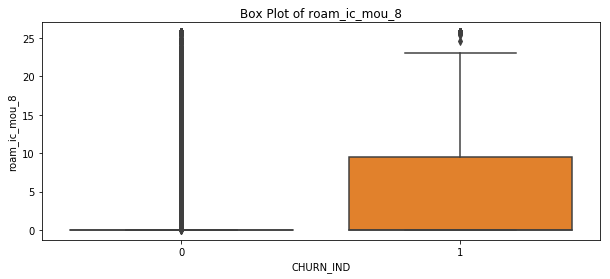

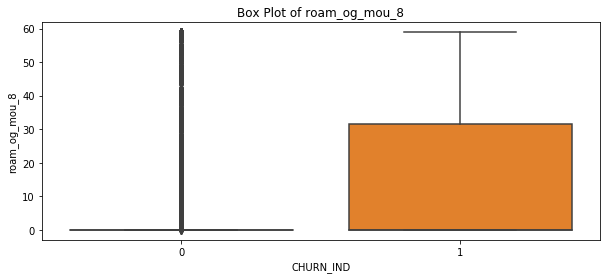

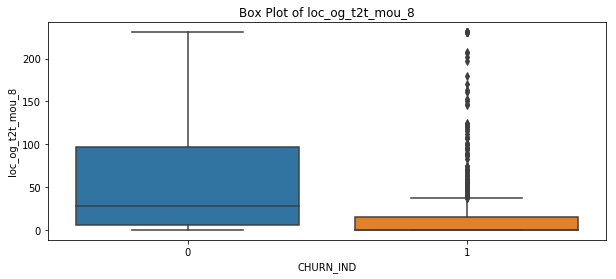

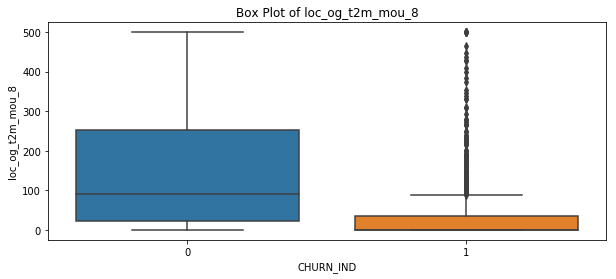

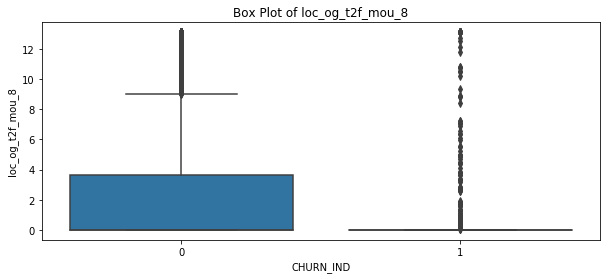

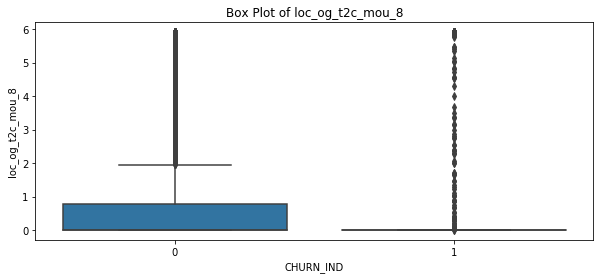

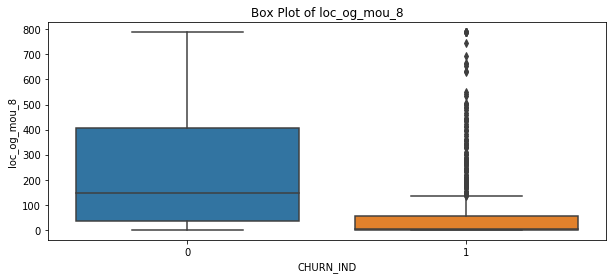

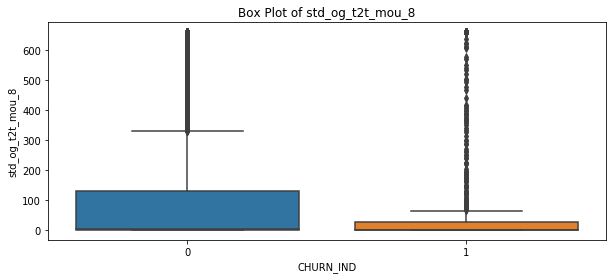

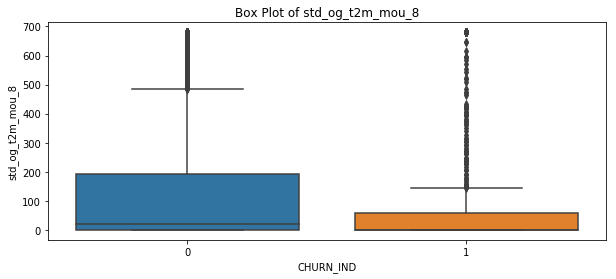

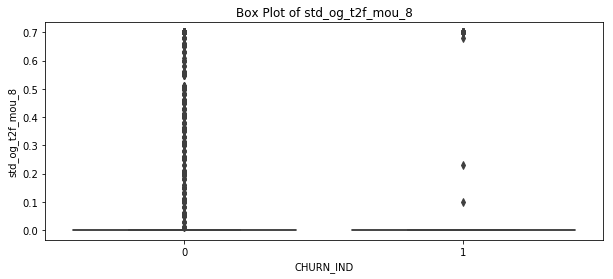

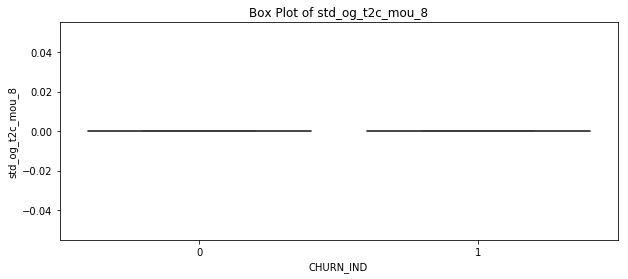

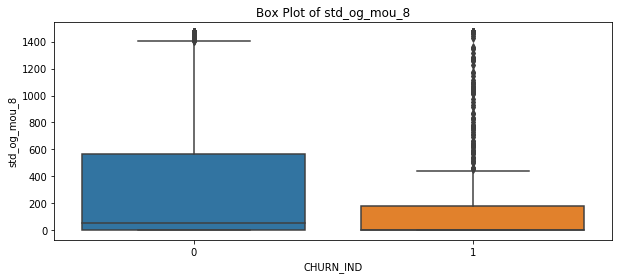

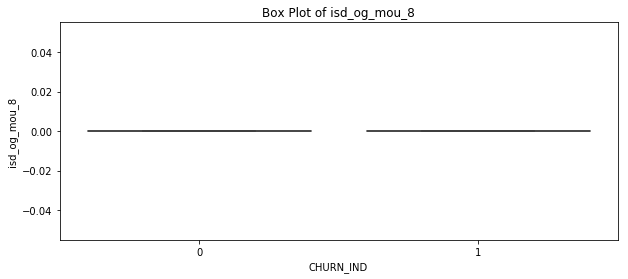

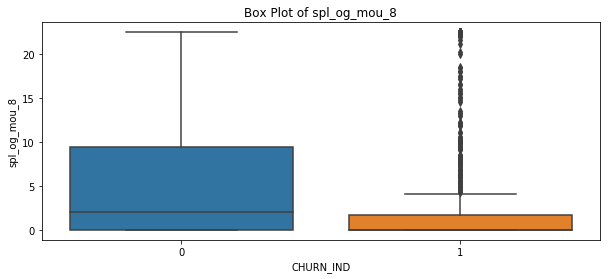

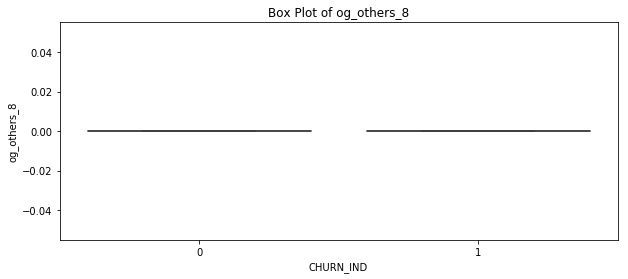

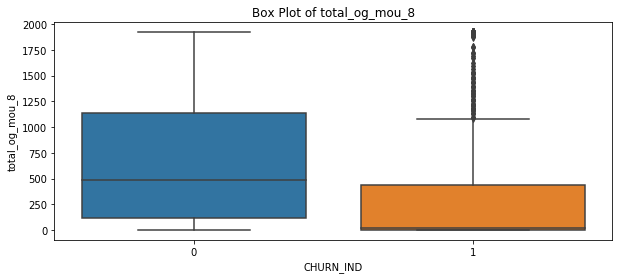

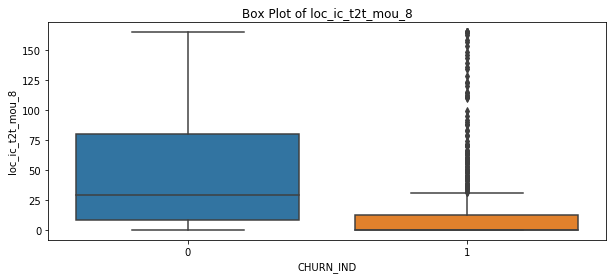

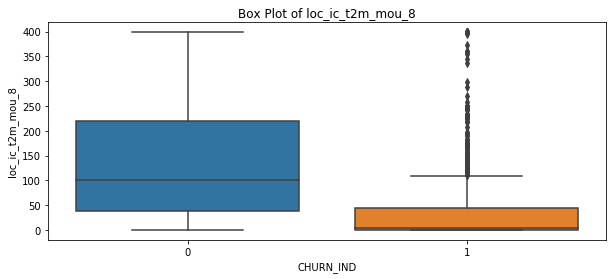

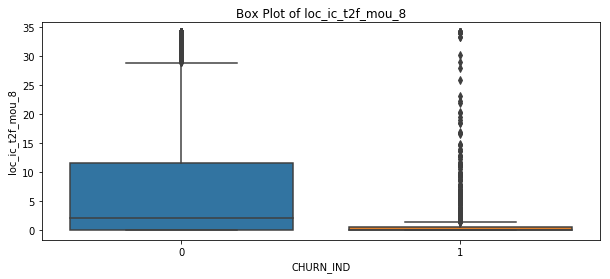

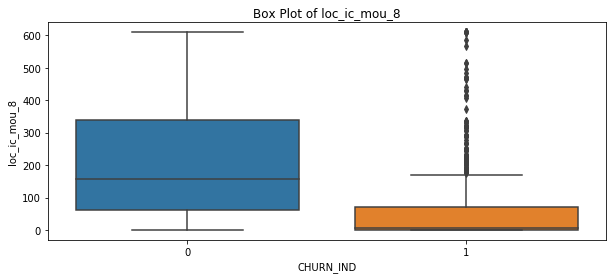

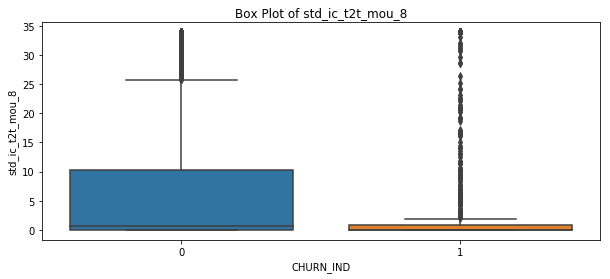

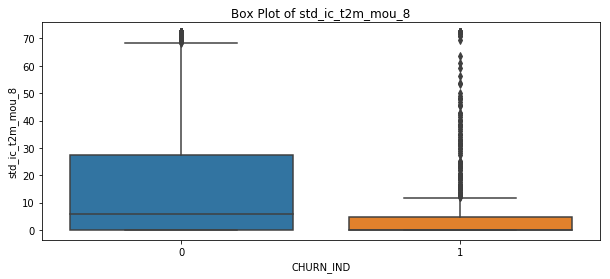

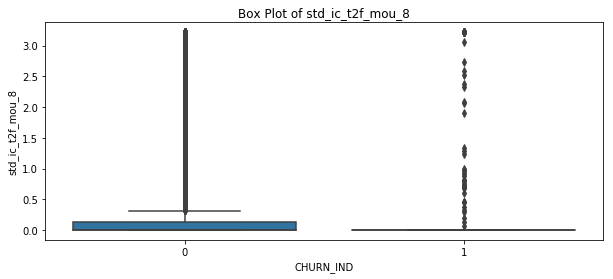

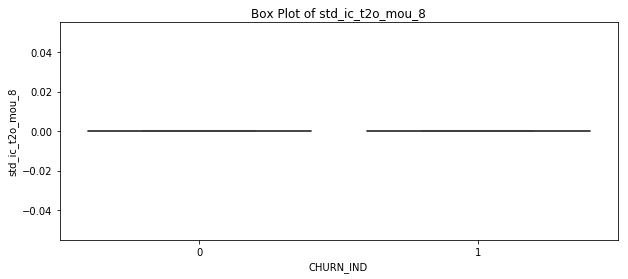

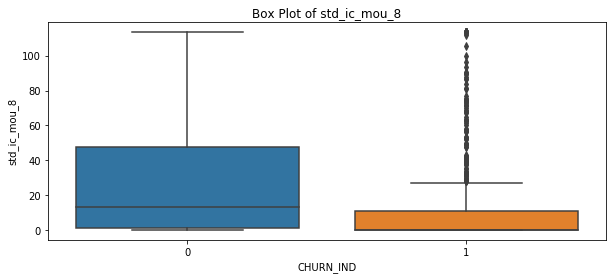

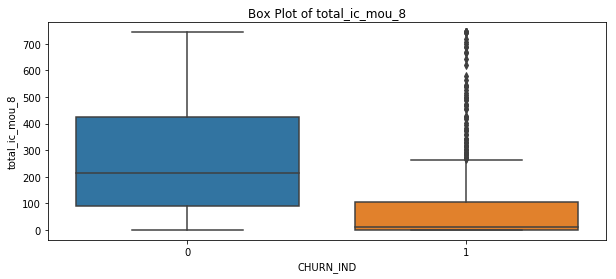

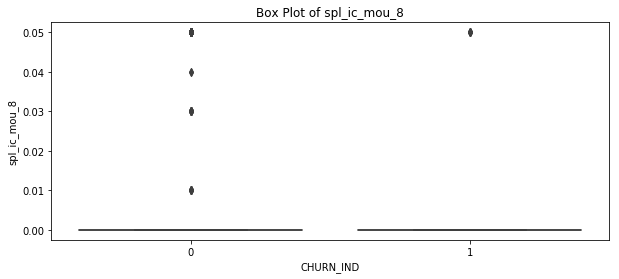

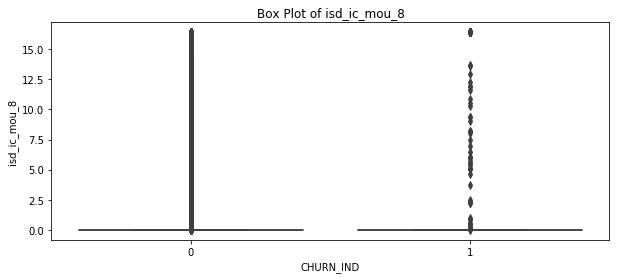

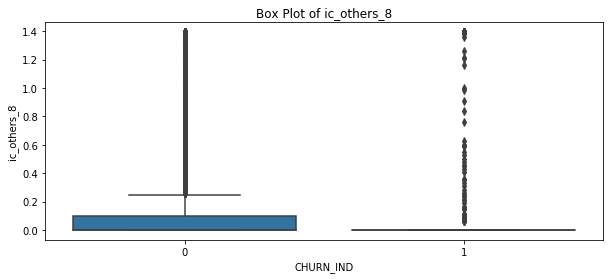

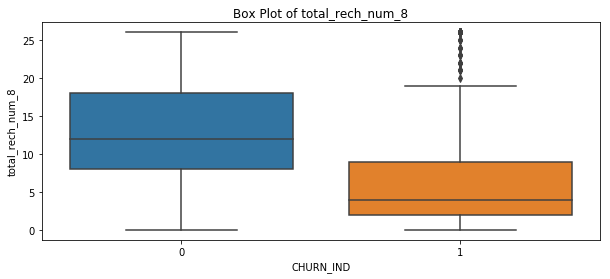

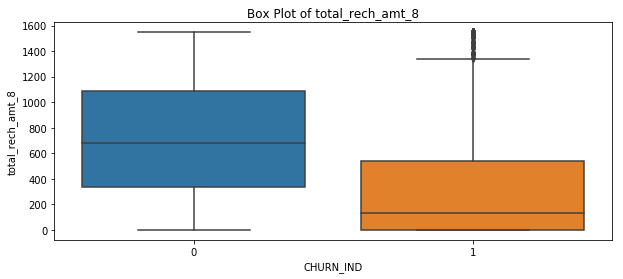

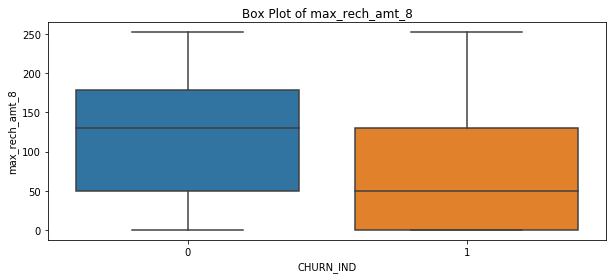

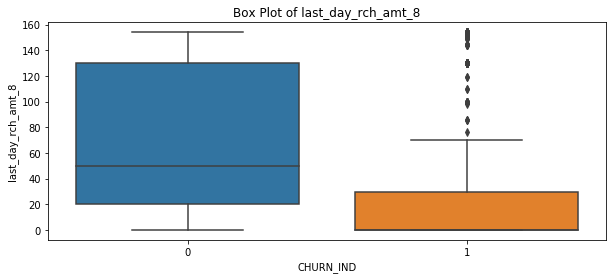

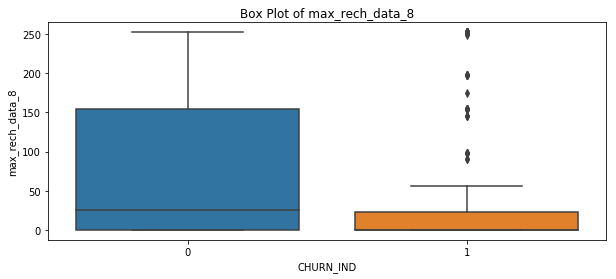

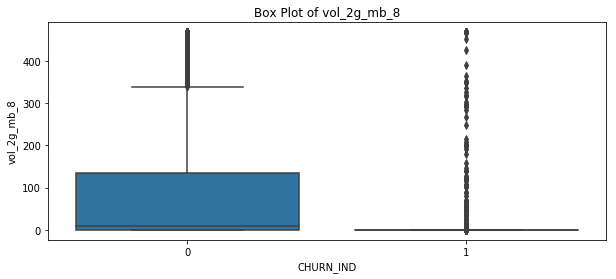

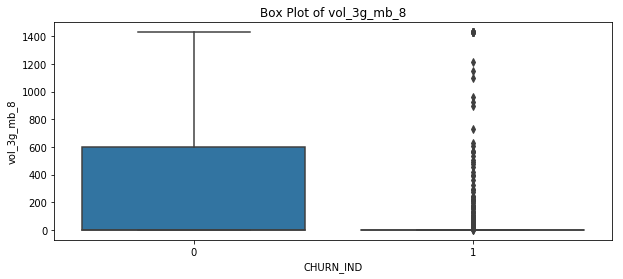

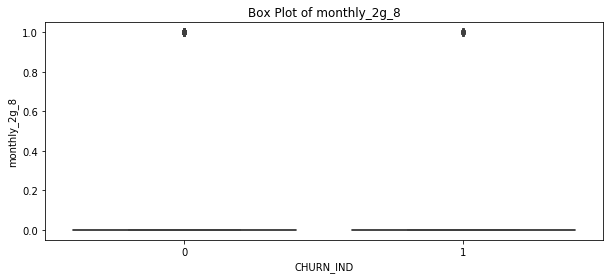

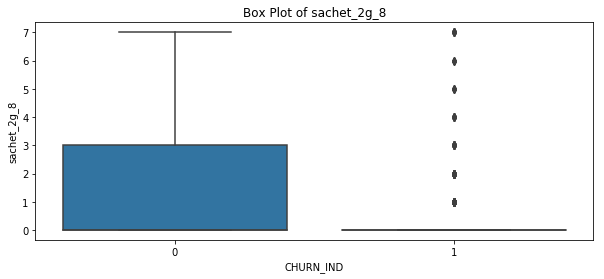

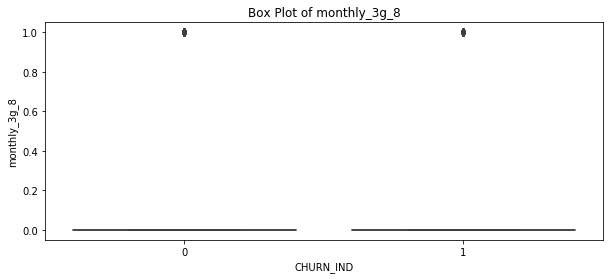

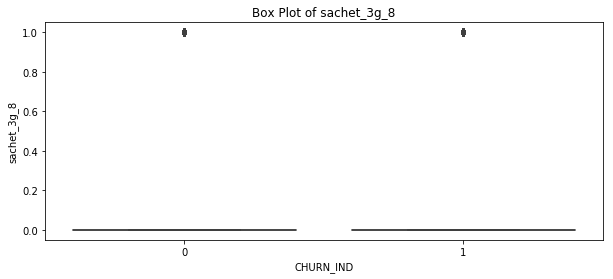

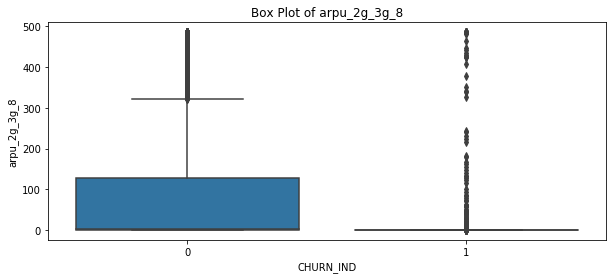

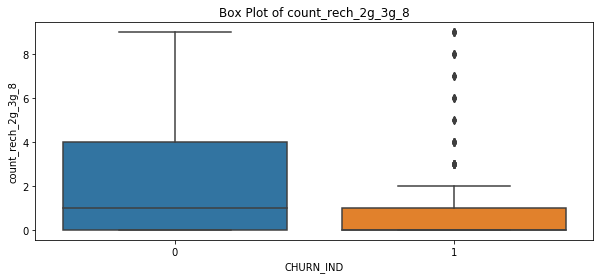

In [85]:
#visualizing month 8 data
for num_variable in plot_cols:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot(x='CHURN_IND', y=num_variable, data = telecom_data_new)
    plt.title(str('Box Plot of ') + str(num_variable))

In [86]:
##Removing columns having unique value since they are not adding any variability to outr dataset

In [87]:
singlelist=[]
for x in telecom_data_new.columns:
    if (telecom_data_new[x].nunique() == 1):
        singlelist.append(x)

print (singlelist)

['std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'og_others_7', 'og_others_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'spl_ic_mou_7']


In [88]:
telecom_data_new.drop(singlelist,axis=1, inplace=True)

**Working with categorical varaibles**

In [89]:
telecom_data_new[cat_list].head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,CHURN_IND
6,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
9,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
10,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
11,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0
15,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0


In [90]:
telecom_data_new[cat_list].isnull().any()

loc_og_t2o_mou      False
std_og_t2o_mou      False
loc_ic_t2o_mou      False
night_pck_user_6     True
night_pck_user_7     True
night_pck_user_8     True
fb_user_6            True
fb_user_7            True
fb_user_8            True
CHURN_IND           False
dtype: bool

**missing values can be imputed with '-1' where -1 can be treated as a new category**

In [91]:
list_to_replace = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

In [92]:
telecom_data_new[list_to_replace] = telecom_data_new[list_to_replace].replace(np.nan, -1, regex=True)

In [93]:
for x in cat_list:
    print(x)
    print(telecom_data_new[x].unique())

loc_og_t2o_mou
[0. 1.]
std_og_t2o_mou
[0. 1.]
loc_ic_t2o_mou
[0. 1.]
night_pck_user_6
[ 1. -1.  0.]
night_pck_user_7
[ 1. -1.  0.]
night_pck_user_8
[ 0. -1.  1.]
fb_user_6
[ 1. -1.  0.]
fb_user_7
[ 1. -1.  0.]
fb_user_8
[ 1. -1.  0.]
CHURN_IND
[0 1]


In [94]:
##So we can see there are two types of categorical variables -
#cat_list1 have 3 different categories; while cat_list2 have 3 different categoris

In [95]:
cat_list1 = ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou']
cat_list2 = ['night_pck_user_6','night_pck_user_7', 'night_pck_user_8','fb_user_6','fb_user_7','fb_user_8' ]

## Bivariate Analysis and Synopysis on categorical varaibles

**For categorical variables-** 

    1> Users who generally proceed with local calls to outside operators the tendecy to default seems higher 
    and for all the months these users have churned. 

    2> For night pack and FB users with the current set of missing value data, usually night pack has higher 
    churn rate for all months and social network sites users (like FB) generally has a higher non churn. 
    
    However, still missing values contribute the biggest share. 
    Hence, more data for this should be seen for a stronger analysis.

In [96]:
# lets define a function to plot loan_status across categorical variables
def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='CHURN_IND', data=telecom_data_new)
    plt.show()

In [97]:
##Visualizing the list 1

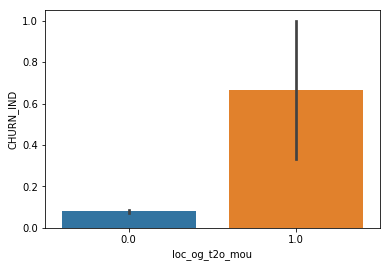

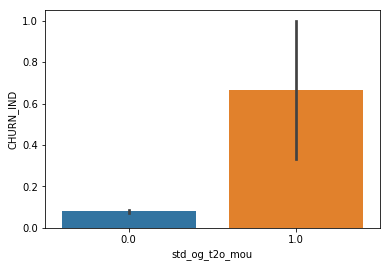

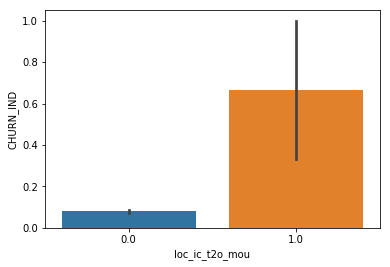

In [98]:
for x in cat_list1:
    plot_cat(x)

In [99]:
##Visualizing the list 2

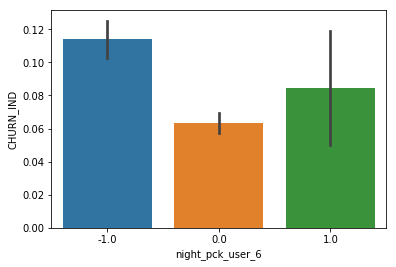

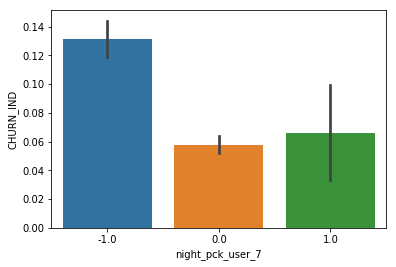

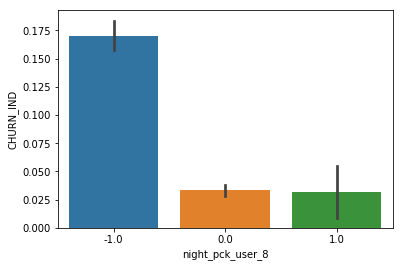

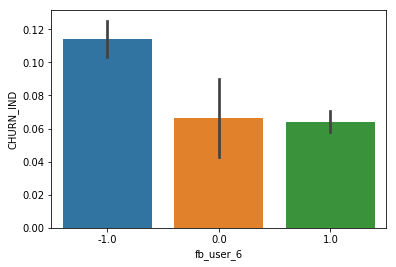

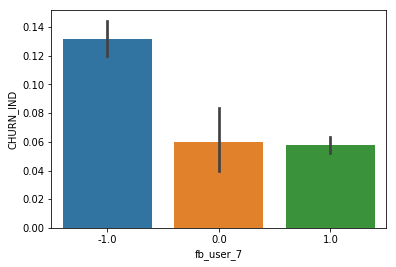

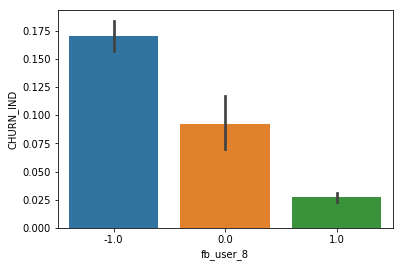

In [100]:
for x in cat_list2:
    plot_cat(x)

In [101]:
telecom_data_new.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,Frequency_recharge_data,Recency_last_recharge_voice,Recency_last_recharge_data,CHURN_IND,arpu_2g_3g_8,arpu_2g_3g_7,arpu_2g_3g_6,count_rech_2g_3g_8,count_rech_2g_3g_7,count_rech_2g_3g_6
6,7000149764,0.0,0.0,0.0,977.0200,1368.1935,409.230,0.000,0.00,0.00,...,14.0,5.0,5.0,0,485.173,530.949,522.436,1.0,8.0,5.0
9,7000294396,0.0,0.0,0.0,1360.8656,575.9270,179.218,1135.404,881.43,156.91,...,0.0,3.0,0.0,0,0.000,0.000,0.000,0.0,0.0,0.0
10,7002188521,0.0,0.0,0.0,978.0770,1141.2960,706.020,135.140,119.59,102.69,...,10.0,5.0,20.0,0,0.000,0.000,12.000,1.0,5.0,4.0
11,7002180748,0.0,0.0,0.0,452.6240,320.5480,368.807,34.460,43.11,50.61,...,25.0,0.0,0.0,0,36.140,32.150,-0.220,9.0,10.0,2.0
15,7002393996,0.0,0.0,0.0,809.5180,794.7750,33.060,181.630,257.06,0.00,...,0.0,0.0,0.0,0,0.000,0.000,0.000,0.0,0.0,0.0


**Replacing the categorical varaibles with percentage of churn -**

In [102]:
##For list 1

In [103]:
for catvar in cat_list2:
    print(catvar)
    to = telecom_data_new.groupby([catvar, 'CHURN_IND']).agg({'mobile_number': 'sum'})
    # Change: groupby state_office and divide by sum
    to_pcts = to.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
    pct0 = to_pcts.mobile_number[(to_pcts.CHURN_IND==1) & (to_pcts[catvar] == 0.0)].round(1)
    pct1 = to_pcts.mobile_number[(to_pcts.CHURN_IND==1) & (to_pcts[catvar] == 1.0)].round(1)
    pct3 = to_pcts.mobile_number[(to_pcts.CHURN_IND==1) & (to_pcts[catvar] == -1.0)].round(1)
    var0 = float(pct0)
    var1 = float(pct1)
    var2 = float(pct3)
    print(var0)
    print(var1)
    print(var2)
    telecom_data_new[catvar].replace({0.0 : var0, 1.0 : var1, -1.0 : var2}, axis=1,inplace=True)

night_pck_user_6
6.3
8.4
11.4
night_pck_user_7
5.8
6.6
13.2
night_pck_user_8
3.3
3.2
17.0
fb_user_6
6.6
6.4
11.4
fb_user_7
6.0
5.8
13.2
fb_user_8
9.2
2.7
17.0


C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\generic.py:4480: UserWarning: the "axis" argument is deprecated and will be removed inv0.13; this argument has no effect
  warnings.warn('the "axis" argument is deprecated '


In [104]:
##For List2

In [105]:
for catvar in cat_list1:
    print(catvar)
    to = telecom_data_new.groupby([catvar, 'CHURN_IND']).agg({'mobile_number': 'sum'})
    # Change: groupby state_office and divide by sum
    to_pcts = to.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
    pct0 = to_pcts.mobile_number[(to_pcts.CHURN_IND==1) & (to_pcts[catvar] == 0.0)].round(1)
    pct1 = to_pcts.mobile_number[(to_pcts.CHURN_IND==1) & (to_pcts[catvar] == 1.0)].round(1)
    var0 = float(pct0)
    var1 = float(pct1)
    print(var0)
    print(var1)
    telecom_data_new[catvar].replace({0.0 : var0, 1.0 : var1}, axis=1,inplace=True)

loc_og_t2o_mou


C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\generic.py:4480: UserWarning: the "axis" argument is deprecated and will be removed inv0.13; this argument has no effect
  warnings.warn('the "axis" argument is deprecated '


7.9
66.7
std_og_t2o_mou
7.9
66.7
loc_ic_t2o_mou
7.9
66.7


## 3. MODEL CREATION

### MODEL 1 -

    It will be used to identify important variables that are strong predictors of churn. 
    These variables may also indicate why customers choose to switch to other networks. 

In [106]:
telecom_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9198 entries, 6 to 30648
Columns: 146 entries, mobile_number to count_rech_2g_3g_6
dtypes: float64(144), int64(2)
memory usage: 10.6 MB


In [107]:
##Checking for multicollinearity
telecom_data_new_corr=telecom_data_new.corr()

In [108]:
telecom_data_new_corr.to_csv('telecom_data_new_corr.csv')

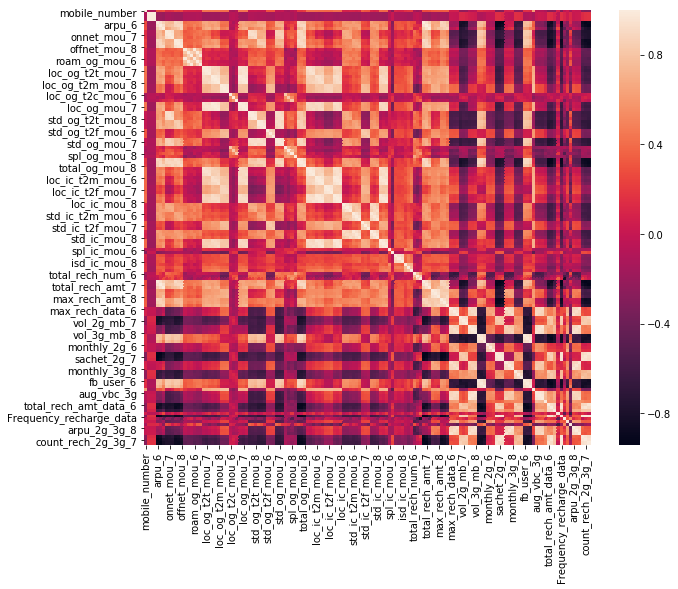

In [109]:
plt.figure(figsize=(10,8))
sns.heatmap(telecom_data_new_corr.corr())

In [110]:
#chossing columns
cols = telecom_data_new.columns.difference( ['CHURN_IND', 'mobile_number'])

In [111]:
X = telecom_data_new[cols ]
Y = telecom_data_new['CHURN_IND']
df_test = telecom_data_new[cols ][telecom_data_new.CHURN_IND == 0]
#this will be our validation set
df_test_mobile = telecom_data_new['mobile_number' ][telecom_data_new.CHURN_IND == 0]

In [112]:

train_X, test_X, train_y, test_y = train_test_split( X,
                                                  Y,
                                                  test_size = 0.3,
                                                  random_state = 123)

In [113]:
len(train_X)

6438

In [114]:
len(test_X)

2760

### Applying SMOTE

In [115]:
train_X.head()

,Frequency_recharge_data,Frequency_recharge_voice,Recency_last_recharge_data,Recency_last_recharge_voice,aon,arpu_2g_3g_6,arpu_2g_3g_7,arpu_2g_3g_8,arpu_6,arpu_7,...,total_rech_amt_data_7,total_rech_num_6,total_rech_num_7,total_rech_num_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
9041,15.0,3.0,0.0,0.0,630.0,0.00,0.00,0.08,406.8610,427.162,...,1127.0,10.0,13.0,11.0,0.00,0.00,0.00,0.0,0.0,0.01
3239,0.0,3.0,0.0,3.0,538.0,0.00,0.00,0.00,1238.3070,520.013,...,0.0,17.0,9.0,7.0,0.00,0.00,0.00,0.0,0.0,0.00
26575,2.0,3.0,2.0,2.0,1576.0,0.00,0.00,0.00,794.4080,733.597,...,25.0,13.0,14.0,9.0,0.00,0.00,0.00,0.0,0.0,0.00
21868,1.0,3.0,0.0,0.0,311.0,70.00,0.00,0.00,1360.8656,729.337,...,0.0,26.0,13.0,4.0,1.16,0.00,0.00,0.0,0.0,0.00
8195,18.0,3.0,1.0,0.0,489.0,10.32,25.52,1.30,230.0680,428.787,...,636.0,17.0,29.0,26.0,116.96,183.14,329.78,0.0,0.0,0.00


In [116]:
sm = SMOTE(random_state=123, ratio = 1)
x_train_res, y_train_res = sm.fit_sample(train_X,  train_y)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [117]:
#checking data uniformity
y = np.bincount(y_train_res)
ii = np.nonzero(y)[0]

np.vstack((ii,y[ii])).T

array([[   0, 5905],
       [   1, 5905]], dtype=int64)

### Implementing RFE

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [119]:
logreg = LogisticRegression()
rfe = RFE(logreg, 50) 

**Please note RFE run process takes lots of time**

In [127]:
# running RFE with 50 variables as output
rfe2 = rfe.fit(x_train_res,y_train_res)

In [ ]:
#RFECols2 = train_X.columns[rfe2.support_]
#RFECols2

In [120]:
#extracted from RFE
top50cols = ['Frequency_recharge_data', 'Frequency_recharge_voice',
       'Recency_last_recharge_data', 'Recency_last_recharge_voice',
       'count_rech_2g_3g_6', 'count_rech_2g_3g_7', 'count_rech_2g_3g_8',
       'fb_user_6', 'fb_user_7', 'fb_user_8', 'ic_others_6', 'ic_others_8',
       'isd_ic_mou_6', 'isd_ic_mou_7', 'last_day_rch_amt_8',
       'loc_ic_t2f_mou_8', 'loc_ic_t2o_mou', 'loc_ic_t2t_mou_8',
       'loc_og_t2c_mou_8', 'loc_og_t2o_mou', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'monthly_3g_7', 'monthly_3g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'og_others_6', 'roam_ic_mou_8',
       'roam_og_mou_7', 'roam_og_mou_8', 'sachet_2g_6', 'sachet_2g_7',
       'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7', 'sep_vbc_3g',
       'spl_ic_mou_6', 'spl_og_mou_8', 'std_ic_mou_7', 'std_ic_t2f_mou_8',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
       'std_ic_t2t_mou_8', 'std_og_t2f_mou_8', 'std_og_t2o_mou',
       'total_rech_num_7', 'total_rech_num_8']

In [121]:
##Working with top 50 rows
X_NEW = telecom_data_new[top50cols ]
Y_NEW = telecom_data_new['CHURN_IND']

X_train, X_test, y_train, y_test = train_test_split( X_NEW,
                                                  Y_NEW,
                                                  test_size = 0.3,
                                                  random_state = 123)

In [122]:
X_train.columns

Index(['Frequency_recharge_data', 'Frequency_recharge_voice',
       'Recency_last_recharge_data', 'Recency_last_recharge_voice',
       'count_rech_2g_3g_6', 'count_rech_2g_3g_7', 'count_rech_2g_3g_8',
       'fb_user_6', 'fb_user_7', 'fb_user_8', 'ic_others_6', 'ic_others_8',
       'isd_ic_mou_6', 'isd_ic_mou_7', 'last_day_rch_amt_8',
       'loc_ic_t2f_mou_8', 'loc_ic_t2o_mou', 'loc_ic_t2t_mou_8',
       'loc_og_t2c_mou_8', 'loc_og_t2o_mou', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'monthly_3g_7', 'monthly_3g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'og_others_6', 'roam_ic_mou_8',
       'roam_og_mou_7', 'roam_og_mou_8', 'sachet_2g_6', 'sachet_2g_7',
       'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7', 'sep_vbc_3g',
       'spl_ic_mou_6', 'spl_og_mou_8', 'std_ic_mou_7', 'std_ic_t2f_mou_8',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
       'std_ic_t2t_mou_8', 'std_og_t2f_mou_8', 'std_og_t2o_mou',
       'total_rech_n

### BUILDING RANDOM FOREST MODEL

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=1000 )
radm_clf.fit( X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [125]:
radm_test_pred = pd.DataFrame( { 'actual':  y_test,
                            'predicted': radm_clf.predict( X_test ) } )

In [126]:
metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted )

0.9460144927536231

Text(0.5,15,'Predicted label')

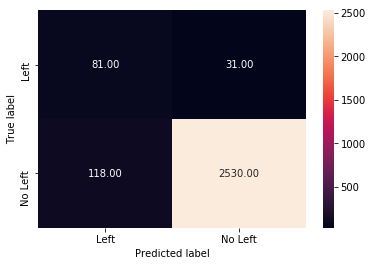

In [127]:
tree_cm = metrics.confusion_matrix( radm_test_pred.predicted,
                                 radm_test_pred.actual,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

### Feature importance from the Random Forest Model

In [128]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]

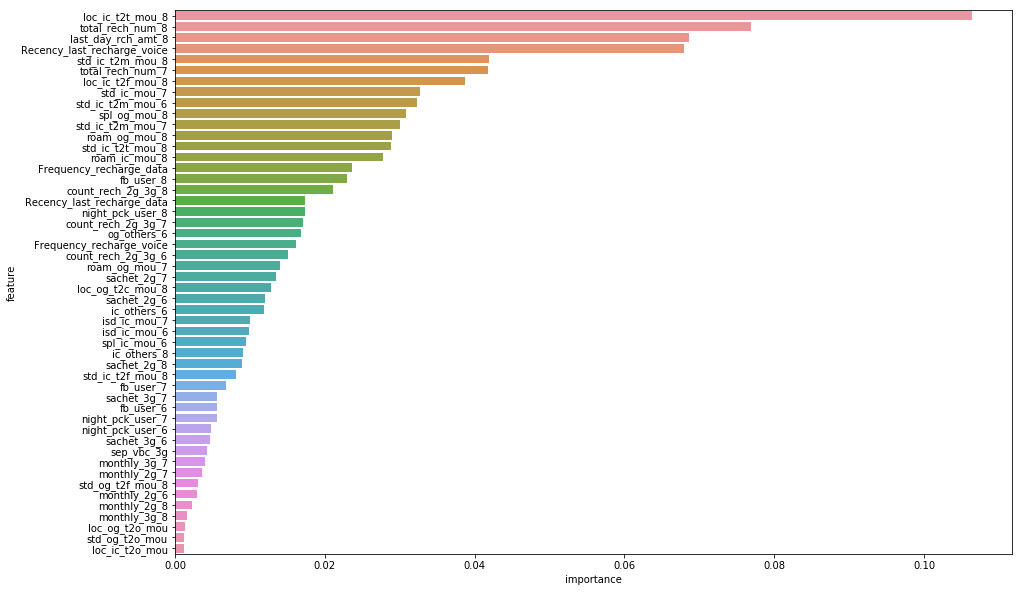

In [129]:
# the size of A4 paper

plt.figure(figsize=(15,10))
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(X_train.shape[1]):
  feature_rank.loc[f] = [f+1,
                         X_train.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

<b> Note: </b>
As per the model, based on the most important features we can conclude:-

    1. The most important influencers for churn have all been in the third month (or month - 8).
    
    2. Local incoming calls from the same operator for third month - 
    this feature for the third month contributed the most for the customer churn followed by last recharge, 
    std incoming and total recharge number, all for third month.
    
    3. Last recharge voice is the fifth most important feature and understandably states the usage recency 
    and the usage patterns of the user. 
    
    4. Incoming calls on the overall are usually the most significant factors for the churn to happen, 
    for both STD and Local. ISD however, comes out as not so important a factor for people to churn. 
    
    5. Internet users for 2G, 3G and social media site users all gather in the bottom as per the importance 
    of a factor ranking and the company should promote more internet based offers.

### MODEL 2 - TO PREDICT CHURNERS

    It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). 
    By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

In [130]:
cols = telecom_data_new.columns.difference( ['CHURN_IND', 'mobile_number'] )

In [131]:
X = telecom_data_new[cols ]
Y = telecom_data_new['CHURN_IND']

In [132]:
X.count()[0]

9198

In [133]:
df_test.count()[0]

8466

In [134]:
df_arpu = df_test[['arpu_6','arpu_7','arpu_8']]

#### Standardizing the data

In [135]:
from sklearn.preprocessing import StandardScaler

In [136]:
sc=StandardScaler()

In [137]:
x_train_scaled=sc.fit_transform(X)

In [138]:
x_test_scaled=sc.fit_transform(df_test)

In [139]:
print(len(x_train_scaled))
print(len(x_test_scaled))

9198
8466


#### Dividing the data into train and test

In [140]:
from sklearn.cross_validation import train_test_split


train_X, test_X, train_y, test_y = train_test_split( x_train_scaled,
                                                  Y,
                                                  test_size = 0.3,
                                                  random_state = 123)

In [141]:
print(len(train_X), len(test_X))

6438 2760


#### Applying SMOTE

In [142]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=123, ratio = 1)
x_train_res, y_train_res = sm.fit_sample(train_X,  train_y)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [143]:
len(x_train_res)

11810

In [144]:
import numpy as np
y = np.bincount(y_train_res)
ii = np.nonzero(y)[0]

np.vstack((ii,y[ii])).T

array([[   0, 5905],
       [   1, 5905]], dtype=int64)

### Applying PCA

In [145]:
#Improting the PCA module
from sklearn.decomposition import PCA

In [146]:
var_ratio={}
for n in range(2,50):
    pca = PCA(n_components=n, random_state = 123)
    telePCA = pca.fit(x_train_res)
    var_ratio[n]=sum(telePCA.explained_variance_ratio_)

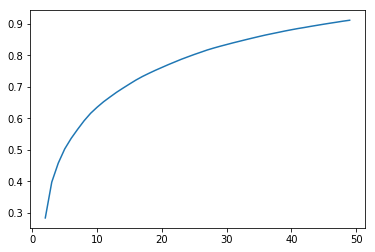

In [147]:
#Making the screeplot - plotting the cumulative variance against the number of components
pd.Series(var_ratio).plot()

In [148]:
var_ratio

{2: 0.283200330196833,
 3: 0.39708996525267637,
 4: 0.4572936453248848,
 5: 0.5025844475026888,
 6: 0.5362836483829843,
 7: 0.5651375301026571,
 8: 0.5923780623564717,
 9: 0.6159825404571609,
 10: 0.6351949464466696,
 11: 0.6526278528497202,
 12: 0.6678403287009772,
 13: 0.6826431377641131,
 14: 0.6960140551465049,
 15: 0.708984306691917,
 16: 0.7216707686457783,
 17: 0.7329619887035023,
 18: 0.7430439218538621,
 19: 0.7526740617822247,
 20: 0.7617096213740284,
 21: 0.7707197070455272,
 22: 0.7792025920266736,
 23: 0.7876775155711522,
 24: 0.7953845285372483,
 25: 0.8029687100991336,
 26: 0.8100361877659193,
 27: 0.8172035734343652,
 28: 0.8234039116566968,
 29: 0.8291552292637083,
 30: 0.8345800904769235,
 31: 0.8399955665250604,
 32: 0.845078912204351,
 33: 0.8502364617083858,
 34: 0.8551972613798775,
 35: 0.8601052402835265,
 36: 0.8648338671219773,
 37: 0.8691050966551687,
 38: 0.873327054233777,
 39: 0.8776536265419755,
 40: 0.8815942449703422,
 41: 0.8854161396209218,
 42: 0.8887

In [149]:
#90% variance
pc_final=PCA(n_components=45)
df_train_pca=pc_final.fit_transform(x_train_res)

In [150]:
df_train_pca.shape

(11810, 45)

In [151]:
x_train_scaled.shape

(9198, 144)

In [152]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' + str(i) for i in range(45)], index=cols)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44
Frequency_recharge_data,0.149688,0.062245,-0.055762,-0.088410,-0.074592,0.075982,0.017349,0.028433,-0.014184,0.122994,...,0.014123,-0.010814,0.010932,-0.035198,-0.010765,0.046682,0.022266,-0.011575,0.023556,0.003226
Frequency_recharge_voice,-0.056434,0.101305,0.029278,-0.472326,-0.137577,-0.545810,-0.115429,-0.065409,-0.561419,-0.096225,...,-0.032483,-0.002874,-0.019664,-0.008181,0.008994,-0.019184,0.018763,-0.038189,-0.022791,-0.036726
Recency_last_recharge_data,0.038872,0.073106,-0.011914,-0.021105,0.012618,0.097423,-0.000343,0.004740,0.096482,-0.036101,...,-0.000599,-0.012895,-0.072136,0.027063,0.107359,-0.135872,-0.147189,0.021717,-0.203825,-0.101842
Recency_last_recharge_voice,0.034437,-0.071173,-0.000147,0.162861,0.084835,0.008837,-0.016085,-0.010060,-0.079795,-0.082352,...,0.009044,-0.020800,-0.067201,0.144929,-0.226484,0.239854,0.351497,-0.013807,0.407165,-0.061493
aon,-0.032609,0.064200,-0.001763,0.013160,0.005222,-0.060790,-0.048987,0.043782,0.051109,-0.049698,...,-0.023164,-0.135415,-0.081969,0.137437,0.425937,0.390009,0.054368,0.361957,0.072210,-0.015329
arpu_2g_3g_6,0.029715,0.109991,-0.000918,0.018166,0.196180,0.054347,-0.005536,-0.106015,-0.073792,0.085161,...,-0.017096,-0.015834,-0.039498,-0.019927,0.000737,-0.070478,0.022861,0.024191,0.066966,0.099086
arpu_2g_3g_7,0.023373,0.116036,-0.008642,-0.040458,0.161291,0.041314,-0.003066,-0.118915,-0.044200,0.027903,...,0.041782,-0.020453,0.031049,-0.001646,0.114244,-0.042228,0.096315,0.007818,-0.013120,-0.064586
arpu_2g_3g_8,0.006096,0.109633,-0.005449,-0.065690,0.135955,0.039314,0.002960,-0.087085,-0.000079,0.059807,...,-0.027186,0.023785,0.024134,-0.024835,-0.138829,0.161510,-0.019253,-0.053575,-0.013809,-0.022300
arpu_6,-0.147622,-0.018728,0.052870,0.056950,0.106033,-0.001531,0.024627,-0.081353,-0.074741,0.165709,...,0.090515,0.009466,0.081038,0.069043,-0.013171,-0.018384,-0.062391,0.038334,-0.036823,-0.027364
arpu_7,-0.157122,0.020523,0.057951,-0.050520,0.045447,0.016594,0.035567,-0.078115,0.025459,0.047686,...,0.031570,0.005920,-0.025421,0.116346,-0.002163,-0.012313,0.024406,0.009504,0.018121,-0.011757


In [153]:
df_test_pca = pc_final.transform(test_X)
df_test_pca.shape

(2760, 45)

In [154]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

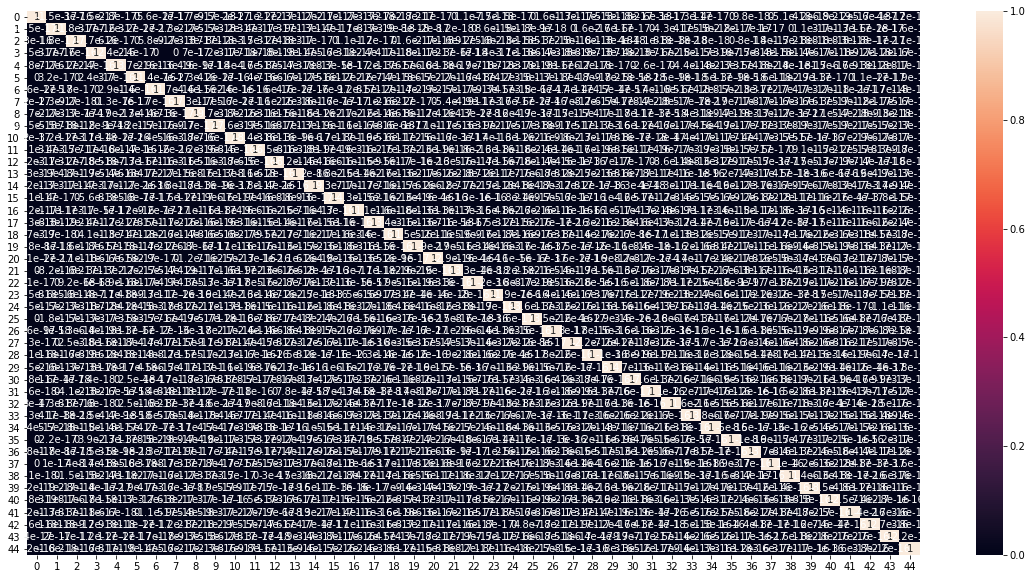

In [155]:
#plotting the correlation matrix -- no co relation
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [156]:
pd.Series(pc_final.explained_variance_ratio_,index=['PC_' + str(i) for i in range(45)])

PC_0     0.161332
PC_1     0.121869
PC_2     0.113890
PC_3     0.060204
PC_4     0.045291
PC_5     0.033699
PC_6     0.028854
PC_7     0.027241
PC_8     0.023604
PC_9     0.019213
PC_10    0.017432
PC_11    0.015213
PC_12    0.014803
PC_13    0.013372
PC_14    0.013012
PC_15    0.012686
PC_16    0.011306
PC_17    0.010148
PC_18    0.009617
PC_19    0.009131
PC_20    0.008897
PC_21    0.008682
PC_22    0.008263
PC_23    0.007771
PC_24    0.007561
PC_25    0.007122
PC_26    0.007085
PC_27    0.006288
PC_28    0.005769
PC_29    0.005557
PC_30    0.005354
PC_31    0.005198
PC_32    0.005088
PC_33    0.004953
PC_34    0.004790
PC_35    0.004757
PC_36    0.004574
PC_37    0.004182
PC_38    0.004144
PC_39    0.003834
PC_40    0.003724
PC_41    0.003540
PC_42    0.003463
PC_43    0.003405
PC_44    0.003334
dtype: float64

In [157]:
#Training the model on the train data

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(df_train_pca,y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Making Predictions

In [158]:
#Making prediction on the test data
pred_probs_test = logsk.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(test_y, pred_probs_test))

'0.92'

In [159]:
#Predicting the test cases
test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': logsk.predict( df_test_pca ) } )

In [160]:
test_pred = test_pred.reset_index()

In [161]:
#Comparing the predictions with actual test data
test_pred.sample( n = 10 )

,index,actual,predicted
2495,21742,0,0
207,9245,0,0
2715,1802,0,0
1835,10453,0,0
1605,10129,0,0
1096,14117,0,0
2361,28739,1,1
2429,12801,0,0
356,16930,0,0
1398,10449,0,0


In [162]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix( test_pred.actual,
                            test_pred.predicted, [1,0] )
cm

array([[ 165,   34],
       [ 300, 2261]], dtype=int64)

Text(0.5,15,'Predicted label')

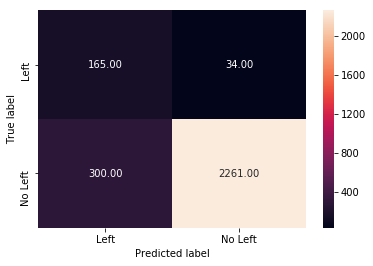

In [163]:
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [164]:
##This is good preduction of churn(left)

In [165]:
#How good the model is?
predict_proba_df = pd.DataFrame( logsk.predict_proba( df_test_pca ) )
predict_proba_df.head()

,0,1
0,0.997531,0.002469
1,0.997732,0.002268
2,0.643395,0.356605
3,0.891228,0.108772
4,0.993860,0.006140


In [166]:
test_pred = pd.concat( [test_pred, predict_proba_df], axis = 1 )

In [167]:
test_pred.columns = ['index', 'actual', 'predicted', 'Left_0', 'Left_1']

In [168]:
test_pred.head()

,index,actual,predicted,Left_0,Left_1
0,4633,0,0,0.997531,0.002469
1,27748,0,0,0.997732,0.002268
2,3159,0,0,0.643395,0.356605
3,7335,0,0,0.891228,0.108772
4,25117,0,0,0.993860,0.006140


In [169]:
auc_score = metrics.roc_auc_score( test_pred.actual, test_pred.Left_1  )
round( float( auc_score ), 2 )

0.92

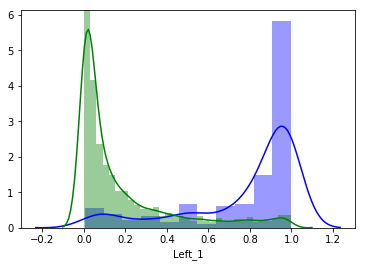

In [170]:
sns.distplot( test_pred[test_pred.actual == 1]["Left_1"], color = 'b' )
sns.distplot( test_pred[test_pred.actual == 0]["Left_1"], color = 'g' )

### ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

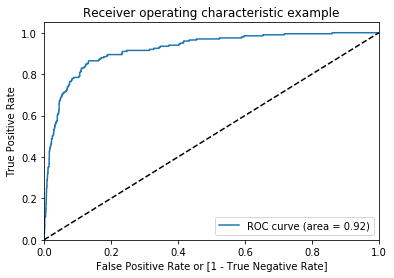

In [171]:
# Finding the optimal cutoff probability
fpr, tpr, thresholds = metrics.roc_curve( test_pred.actual,
                                     test_pred.Left_1,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Finding Optimal Cutoff Point

In [172]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    test_pred[i]= test_pred.Left_1.map( lambda x: 1 if x > i else 0)
test_pred.head(10)

,index,actual,predicted,Left_0,Left_1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,4633,0,0,0.997531,0.002469,1,0,0,0,0,0,0,0,0,0
1,27748,0,0,0.997732,0.002268,1,0,0,0,0,0,0,0,0,0
2,3159,0,0,0.643395,0.356605,1,1,1,1,0,0,0,0,0,0
3,7335,0,0,0.891228,0.108772,1,1,0,0,0,0,0,0,0,0
4,25117,0,0,0.993860,0.006140,1,0,0,0,0,0,0,0,0,0
5,29376,0,0,0.959225,0.040775,1,0,0,0,0,0,0,0,0,0
6,2467,0,0,0.999695,0.000305,1,0,0,0,0,0,0,0,0,0
7,8116,0,0,0.646203,0.353797,1,1,1,1,0,0,0,0,0,0
8,25558,0,0,0.999260,0.000740,1,0,0,0,0,0,0,0,0,0
9,14697,0,0,0.998522,0.001478,1,0,0,0,0,0,0,0,0,0


In [173]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( test_pred.actual, test_pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.072101  0.000000  1.000000
0.1   0.1  0.625362  0.600937  0.939698
0.2   0.2  0.743116  0.729793  0.914573
0.3   0.3  0.809783  0.803202  0.894472
0.4   0.4  0.851449  0.850449  0.864322
0.5   0.5  0.878986  0.882858  0.829146
0.6   0.6  0.900362  0.909410  0.783920
0.7   0.7  0.914130  0.927372  0.743719
0.8   0.8  0.930072  0.948848  0.688442
0.9   0.9  0.938768  0.970324  0.532663


C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


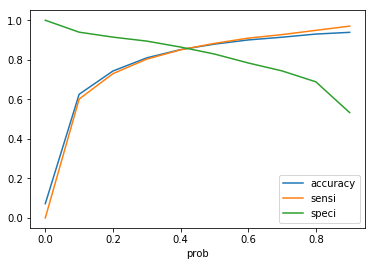

In [174]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [175]:
## model looks good with 0.5

In [176]:
cm = metrics.confusion_matrix( test_pred.actual, test_pred.predicted )
cm

array([[2261,  300],
       [  34,  165]], dtype=int64)

Text(0.5,15,'Predicted label')

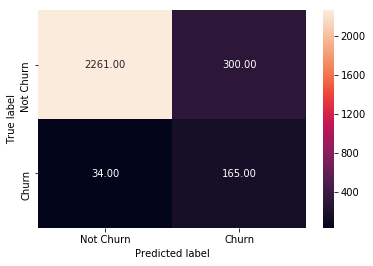

In [177]:
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Not Churn", "Churn"] , yticklabels = ["Not Churn", "Churn"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

### 4. Making prediction on full non churn dataset

    We have the 27K non churn customers (dataset name - x_test_scaled).
    We will be using our model to preduct the churn proabilibity of the customer and possible recommedations

In [178]:
len(x_test_scaled)

8466

In [179]:
df_full_test_pca = pc_final.transform(x_test_scaled)
df_full_test_pca.shape

(8466, 45)

In [180]:
# Predicted probabilities
y_pred_full = logsk.predict_proba(df_full_test_pca)

In [181]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred_full)

In [182]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

In [183]:
# Let's see the head
y_pred_1.count()

1    8466
dtype: int64

In [184]:
df_test_mobile = telecom_data_new[['mobile_number','arpu_6','arpu_7','arpu_8']][telecom_data_new.CHURN_IND == 0]

In [185]:
# Putting mobile number to index
df_test_mobile.head()

,mobile_number,arpu_6,arpu_7,arpu_8
6,7000149764,977.0200,1368.1935,409.230
9,7000294396,1360.8656,575.9270,179.218
10,7002188521,978.0770,1141.2960,706.020
11,7002180748,452.6240,320.5480,368.807
15,7002393996,809.5180,794.7750,33.060


In [186]:
y_pred_1.head()

,1
0,0.518975
1,0.651881
2,0.622539
3,0.028797
4,0.581394


In [187]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
df_test_mobile.reset_index(drop=True, inplace=True)

In [188]:
df_test_mobile.head()

,mobile_number,arpu_6,arpu_7,arpu_8
0,7000149764,977.0200,1368.1935,409.230
1,7000294396,1360.8656,575.9270,179.218
2,7002188521,978.0770,1141.2960,706.020
3,7002180748,452.6240,320.5480,368.807
4,7002393996,809.5180,794.7750,33.060


In [189]:
# Appending y_test_df df_arpuand y_pred_1
y_pred_final = pd.concat([df_test_mobile,y_pred_1],axis=1)

In [190]:
y_pred_final.head()

,mobile_number,arpu_6,arpu_7,arpu_8,1
0,7000149764,977.0200,1368.1935,409.230,0.518975
1,7000294396,1360.8656,575.9270,179.218,0.651881
2,7002188521,978.0770,1141.2960,706.020,0.622539
3,7002180748,452.6240,320.5480,368.807,0.028797
4,7002393996,809.5180,794.7750,33.060,0.581394


In [191]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})

In [192]:
# Let's see the head of y_pred_final
y_pred_final.head()

,mobile_number,arpu_6,arpu_7,arpu_8,Churn_Prob
0,7000149764,977.0200,1368.1935,409.230,0.518975
1,7000294396,1360.8656,575.9270,179.218,0.651881
2,7002188521,978.0770,1141.2960,706.020,0.622539
3,7002180748,452.6240,320.5480,368.807,0.028797
4,7002393996,809.5180,794.7750,33.060,0.581394


## 4. RECOMMENDATIONS:-

**Creating the BAND**

In [193]:
def churntyp(y_pred_final):
    if ((y_pred_final.Churn_Prob  >= 0.0) & (y_pred_final.Churn_Prob <= 0.3)):
        return 'LOW_CHURN_PROBABILITY'
    elif ((y_pred_final.Churn_Prob  > 0.3) & (y_pred_final.Churn_Prob <= 0.7)):
        return 'MED_CHURN_PROBABILITY'
    else:
        return 'HIGH_CHURN_PROBABILITY'

In [194]:
y_pred_final['CHURN_BAND'] = y_pred_final.apply(churntyp, axis=1)

**Showcasing the count of mobilenumbers(customers) for each band**

In [195]:
pd.pivot_table(y_pred_final,index=["CHURN_BAND"],values=["mobile_number", "arpu_6","arpu_7","arpu_8"],
               aggfunc={"mobile_number":'count', "arpu_6":'mean', "arpu_7":'mean', "arpu_8":'mean'},fill_value=0)

,arpu_6,arpu_7,arpu_8,mobile_number
CHURN_BAND,,,,
HIGH_CHURN_PROBABILITY,722.206591,675.707831,322.854568,804
LOW_CHURN_PROBABILITY,691.777208,717.530824,696.099048,6379
MED_CHURN_PROBABILITY,726.835545,716.280824,556.143209,1283


In [196]:
##Preparing a monetary rank for recommendation

In [197]:
## Total Monetary:-
y_pred_final['Total_Mon'] = y_pred_final.apply(lambda x: (x['arpu_6']+x['arpu_7']+x['arpu_8']),axis =1)

In [198]:
y_pred_final['Rank'] = pd.qcut(y_pred_final['Total_Mon'], 4, labels=False)

**Showcasing the rank based on Monetary value and band**

In [199]:
pd.pivot_table(y_pred_final,index=["CHURN_BAND","Rank"],values=["mobile_number", "Total_Mon"],
               aggfunc={"mobile_number":'count', "Total_Mon":'mean'},fill_value=0)

Total_Mon  mobile_number
CHURN_BAND             Rank                            
HIGH_CHURN_PROBABILITY 0      604.320034            256
                       1     1694.523946            249
                       2     2369.458439            191
                       3     3280.456615            108
LOW_CHURN_PROBABILITY  0      742.152105           1527
                       1     1634.846099           1573
                       2     2430.855770           1540
                       3     3439.904948           1739
MED_CHURN_PROBABILITY  0      678.064321            334
                       1     1657.645357            294
                       2     2411.275375            385
                       3     3418.102966            270

### Recommend strategies to manage customer churn:-

    Since the tendency of a customer to churn is dependent on majority of factors, 
    our model tends to share the probability for a certain user to churn on 3 separate scales -  

**1. Low churn probability -**

    This is for the customers who as per the model fall into the factors where in a customer has a very 
    low tendency to churn.
    As per our current data, 70% of our users fall into this category and the concentration should be to 
    keep improving on the factors that keep these users satisfied and reduce the low churn probability 
    to no churn probability. 
    
**2. Medium churn probability -**

    These customers have a tendency to fall into the churn bracket more and understandably these are the customers 
    if focused on can be converted to a non churn customer.     
    Our current customer base has 20% medium churn probability, we should get in touch with them and 
    resolve their concerns and turn them into non-churn customers.
    
    The potential is to convert these into lower churn or no churn probability and non churn or low churn 
    customer bucket strength increases to 90%.
    
**3. High churn probability -**

    These customers are the ones that are highly likely to churn, these are the ones that either not happy 
    with out service set or have a tendency to switch often. 
    These customers though we should try to reduce but the concentration must primarily be about reducing 
    the losses for the organization if any as the tendency to churn is very high. 
    This customer bracket has 10% customers only. 
    
**4. Monetary value rank -**

    The customers in the dataset are ranked based on monetary value(4 - highest and 0 - lowest), 
    organization must emphasis on saving customers of rank 4 customers since they contribute to the major chunk 
    of the revenue.

    ********************************************* Thank you ************************************